<a href="https://colab.research.google.com/github/AnjanaAnoop/Bike-Sharing-Demand-Prediction/blob/main/ML_Capstone_Project_Bike_Sharing_Demand_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Supervised ML - Regression
##### **Contribution**    - Individual
##### **Project done by**- Anjana K


# **Project Summary -**

The Seoul Bike Sharing Demand Prediction project aims to develop a robust regression model to accurately forecast daily bike rental demand in Seoul. This project involves analyzing a comprehensive dataset containing hourly rental records and various contextual features such as date, season, holiday status, working day status, weather conditions, temperature, humidity, and wind speed. The primary objectives include data exploration, feature engineering, model building, and performance evaluation. By leveraging advanced regression techniques, the goal is to create a reliable prediction model that can optimize the distribution of bikes, enhance operational efficiency, and improve user satisfaction. Accurate demand forecasting will enable better resource allocation, reduce operational costs, and provide insights for strategic planning in urban transportation. Ultimately, this project aims to support the sustainable growth of Seoul's bike-sharing program by ensuring the availability of bikes and enhancing the overall user experience.

# **GitHub Link -**

https://github.com/AnjanaAnoop

# **Problem Statement**


The Seoul Bike Sharing Demand Prediction project aims to develop a regression model to forecast daily bike rental demand. Accurate demand prediction is crucial for optimizing the operations of Seoul's bike-sharing program, ensuring bike availability, and enhancing user satisfaction. The project involves examining a dataset that includes hourly records of bike rentals along with various contextual attributes such as date, season, holiday status, working day status, weather conditions, temperature, humidity, and wind speed. The main objectives are to analyze the data, engineer meaningful features, build and compare various regression models, and evaluate their performance using appropriate metrics. The goal is to create a reliable model that can accurately predict bike rental demand, thereby helping to optimize bike distribution and resource allocation. This will improve operational efficiency, reduce costs, and provide a better experience for users. The project also aims to offer insights that can inform strategic decisions and policy-making for urban transportation planning in Seoul.

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

First, we import the libraries and modules which we have to use in this analysis.

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look - Reading and viewing the csv file
bike_df = pd.read_csv('/content/drive/MyDrive/Capstone Project Machine Learning/SeoulBikeData.csv', encoding='ISO-8859-1')

In [4]:
# First 5 rows of the dataset
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
# Last 5 rows of the dataset
bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
row,column = bike_df.shape
print("Total number of rows in dataset :",row)
print("Total number of columns in dataset :",column)

Total number of rows in dataset : 8760
Total number of columns in dataset : 14


### Dataset Information

In [7]:
# Dataset Info - To get a concise summary of the dataframe
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
bike_df.duplicated().value_counts()

False    8760
Name: count, dtype: int64

There are no duplicate entries in this dataset.

#### Missing Values/Null Values

In [9]:
#Checking for null values
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

As we can see the above dataset dont have any null values. By this, we can say the dataset is balanced.

### What did you know about your dataset?

* There are 8760 rows and 14 columns in the given data.
* None of the columns have missing values.
* There are no duplicate entries in this dataset.
* All columns except 'Date' column have the correct datatypes.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe - To get some basic statistical details of the numerical columns
bike_df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description

This dataset contains information on Seoul city's weather conditions  (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall)and the number of bikes rented on every hour and the date information.

**The columns and the data it represents are listed below :**

1.   **Date** :  The date of each observation in the format 'year-month-day'

2.   **Rented Bike Count** : Count of bikes rented at each hour

3.   **Hour** : The hour of the day when the rental occurred

4.   **Temperature** : The temperature recorded in the city in Celsius(°C)

5.   **Humidity** :  Relative humidity in %

6.   **Windspeed** : Speed of the wind in m/s

7.   **Visibility** : Measure of distance at which object or light can be clearly discerned in units of 10m

8.   **Dew Point Temperature (dew_point_temp)** : Temperature recorded in the beginning of the day in Celsius(°C)

9.   **Solar Radiation (solar_radiation)** : Intensity of sunlight in MJ/m².

10.  **Rainfall** : The amount of rainfall in mm

11.  **Snowfall** : The amount of snowfall in cm

12.  **Seasons** : Season of the year (Winter, Spring, Summer, Autumn)

13.  **Holiday** : Whether the day is a Holiday or not (Holiday/No holiday)

14.  **Functional Day** : Whether the rental service is available (Yes-Functional hours) or not (No-Non functional hours)



### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for col in bike_df.columns:
  if bike_df[col].nunique()<500:
    print(f"The unique values in {col} column are :")
    print(bike_df[col].unique())
    print('\n')

The unique values in Date column are :
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/201

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Converting the datatype of Date column to datetime
bike_df['Date'] = pd.to_datetime(bike_df['Date'], format='%d/%m/%Y')

In [14]:
# Extracting Month,Weekday and Year from the date column
bike_df['Month']=bike_df['Date'].dt.month
bike_df['Days_of_week']=bike_df['Date'].dt.day_name()
bike_df['Year']=bike_df['Date'].dt.year
bike_df['Day']=bike_df['Date'].dt.day

In [15]:
# The number of unique values in Date column
bike_df['Date'].nunique()

365

The dataset contains records of rented bikes per hour for a period of 365 days.

In [16]:
# The number of unique values in Year column
bike_df['Year'].value_counts()

Year
2018    8016
2017     744
Name: count, dtype: int64

Most of the records are from the year 2018.

In [17]:
# Finding the date of first and last entry in the dataset
print(f'The dataset contains observations from ',min(bike_df['Date']).date(),'to',max(bike_df['Date']).date())

The dataset contains observations from  2017-12-01 to 2018-11-30


In [18]:
# Creating a column which specifies  if the day is a Weekend('Y')or not ('N')
bike_df['Weekend']=bike_df['Days_of_week'].apply(lambda x : ('Y') if x in ['Saturday','Sunday'] else ('N'))

In [19]:
# Defining dependent variable
dependent_variable = ['Rented Bike Count']

In [20]:
# Defining categorical independent variables separately
cat_var = ['Hour','Seasons', 'Holiday', 'Functioning Day', 'Month', 'Days_of_week', 'Weekend']

In [21]:
# Displaying the unique values in the categorical columns
for col in cat_var:
  print(f'The unique values in the column {col} are {bike_df[col].unique()}')

The unique values in the column Hour are [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
The unique values in the column Seasons are ['Winter' 'Spring' 'Summer' 'Autumn']
The unique values in the column Holiday are ['No Holiday' 'Holiday']
The unique values in the column Functioning Day are ['Yes' 'No']
The unique values in the column Month are [12  1  2  3  4  5  6  7  8  9 10 11]
The unique values in the column Days_of_week are ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
The unique values in the column Weekend are ['N' 'Y']


In [22]:
# First 5 rows of the dataset
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Month Days_of_week  Year  Day Weekend  
0             Yes     12       Friday  2017    1       N  
1             Yes     12       Friday  2017    1       N  
2             Yes     12       Friday  2017    1       N  
3             Yes     12       Friday  2017    1       N  
4             Yes     12       Friday  2017    1       N

### What all manipulations have you done and insights you found?

* The datatype of 'Date' column is corrected.

* From the 'Date' column, 'Month', 'Days_of_week', 'Year' and 'Day' columns are created.

* Created 'Weekend' column which specifies  if the day is a Weekend('Y')or not ('N').


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# ***Univariate Analysis***

#### Chart - 1 : Dependent variable Distribution

Text(0.5, 1.0, 'Distibution of Rented Bike Count')

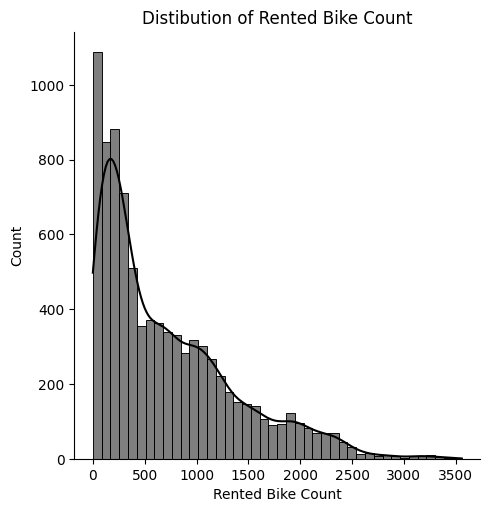

In [23]:
# Chart - 1 visualization code
sns.displot(bike_df['Rented Bike Count'],kde=True,color='black')
plt.title('Distibution of Rented Bike Count')

##### 1. Why did you pick the specific chart?

A displot with KDE was chosen to visualize the distribution of 'Rented Bike Count' because it effectively shows the data's frequency, underlying probability distribution, and potential outliers, making it easy to interpret central tendency, spread, and skewness.

##### 2. What is/are the insight(s) found from the chart?

From the above displot of dependent variable 'Rented Bike Count', we can clearly see that the distribution is positively skewed (Right skewed). It means that distribution is not symmetric around the the mean.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights are valuable for demand forecasting, resource allocation, pricing strategies, operational efficiency, and customer satisfaction. Understanding these patterns helps optimize operations, ensure adequate bike availability, and improve overall profitability and customer experience.


#### Chart - 2: Independent Variable Distribution/ Box plot

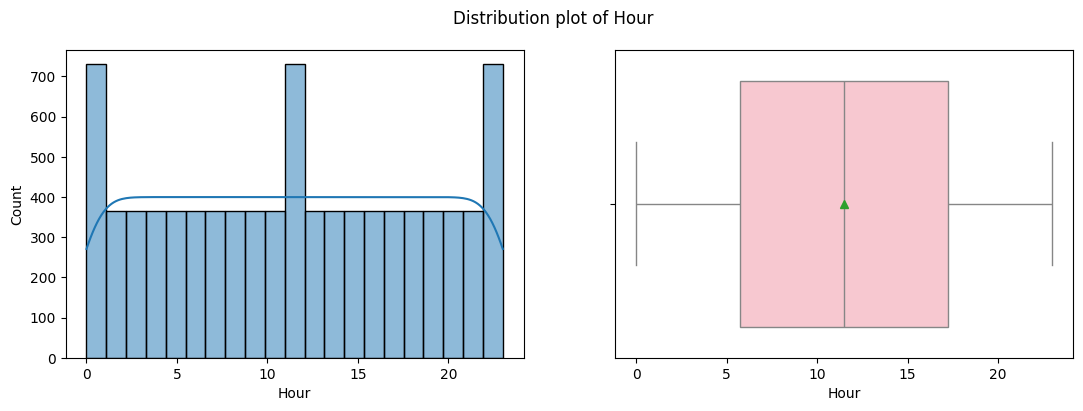

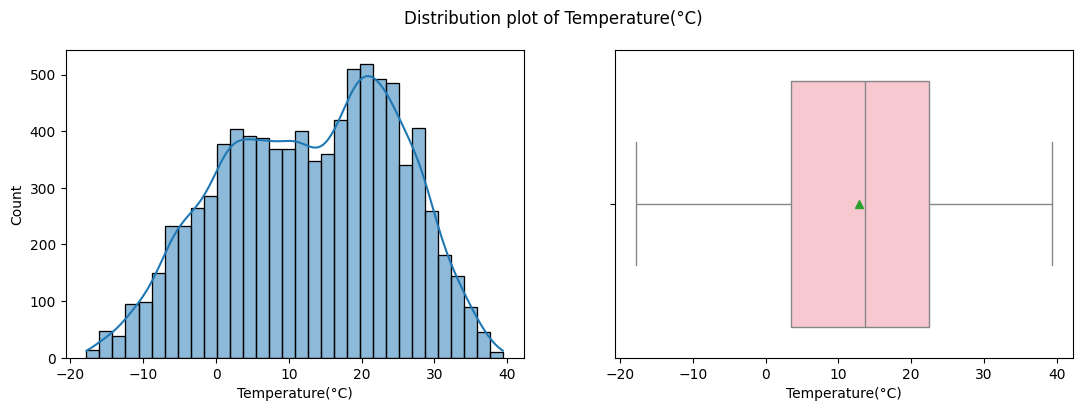

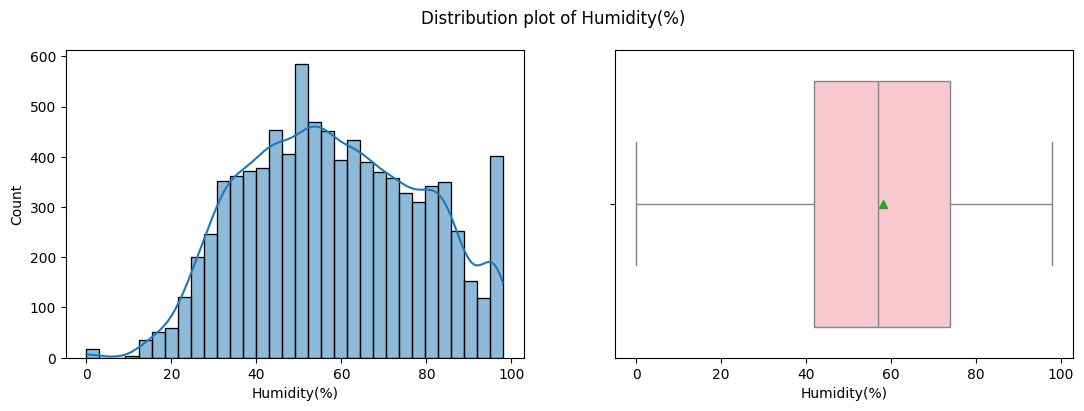

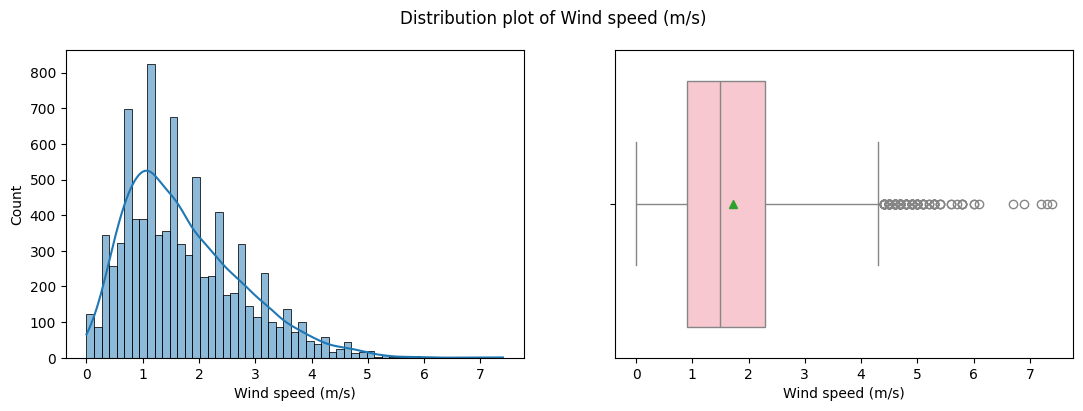

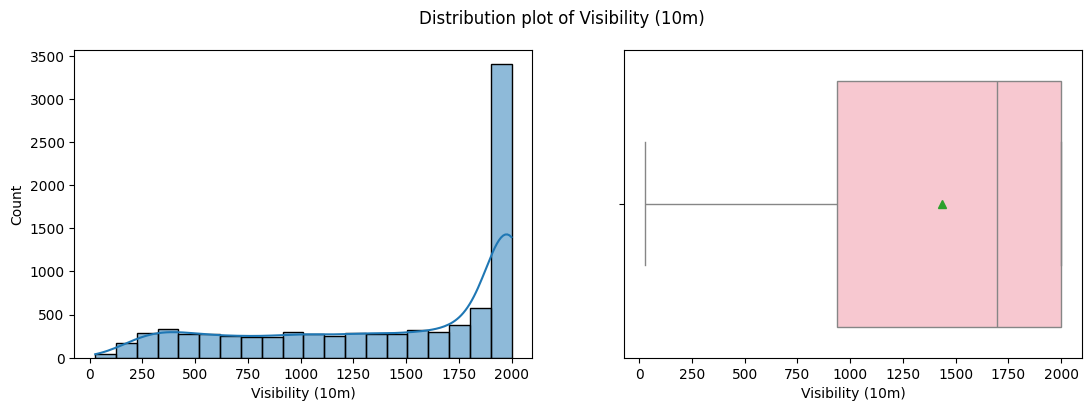

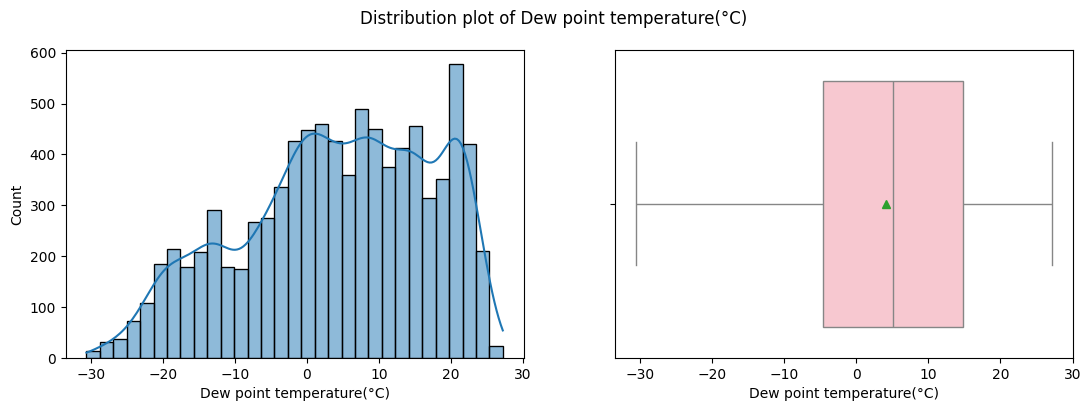

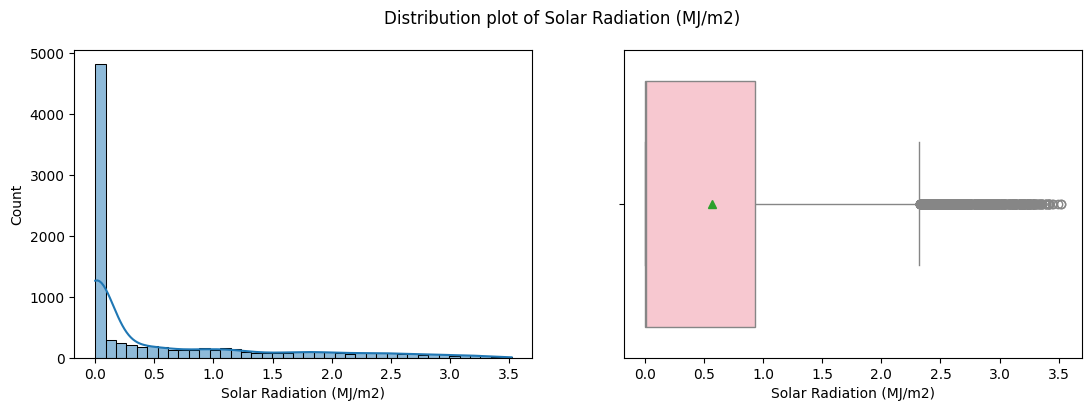

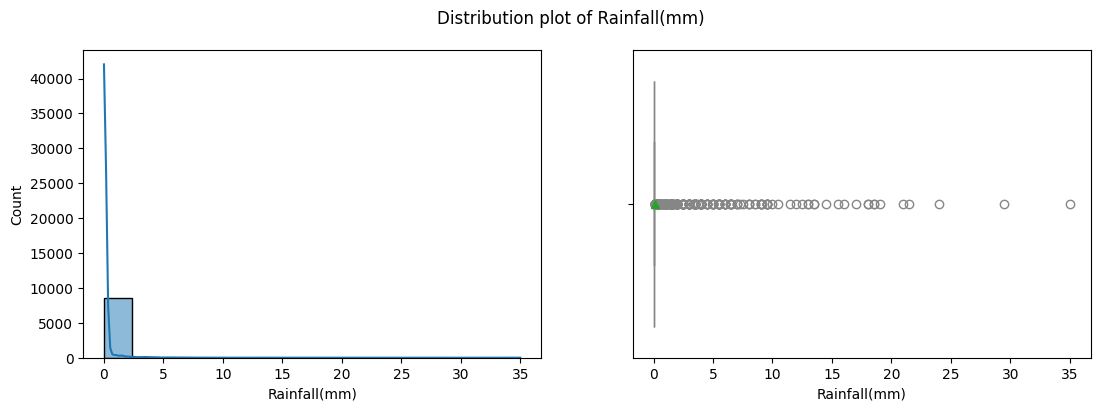

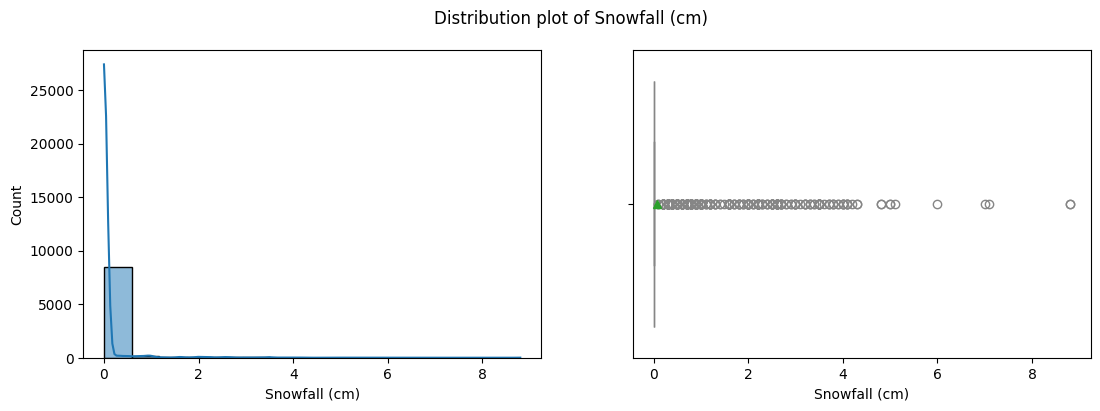

In [24]:
# Chart - 2 visualization code
lis=['Hour','Temperature(°C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Dew point temperature(°C)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)','Snowfall (cm)']
for col in lis:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(13,4))
    sns.histplot(bike_df[col], ax = axes[0],kde = True)
    sns.boxplot(bike_df[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 12)
    plt.show()


##### 1. Why did you pick the specific chart?

This dual visualization approach provides a thorough understanding of the data distribution and summary statistics. The histogram with a KDE shows the frequency distribution and the underlying probability density of the data, highlighting patterns, skewness, and peaks. The boxplot gives a concise summary of the data, showing the median, quartiles, and potential outliers, as well as the mean when showmeans=True is used. Boxplots are particularly effective for identifying outliers, which can be critical for data cleaning and understanding unusual behavior in the data.


##### 2. What is/are the insight(s) found from the chart?

* Distribution of Temperature,Humidity,Dew point temperature are almost normal.
* Wind speed,Solar Radiation,Rainfall,Snowfall-positively skewed
* Visibility is negatively skewed
* The outlier values are not extreme,nor unusual.So,we retain these values in our dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying outliers and understanding distributions helps in data cleaning, ensuring more accurate and reliable data for decision-making. Insights into the distribution and spread of features can guide feature transformation and scaling, improving model performance in predictive analytics. Understanding the distribution of key variables like 'Rented Bike Count' helps in devising targeted strategies for inventory management, marketing, and customer engagement. Recognizing patterns and anomalies aids in optimizing operations, such as ensuring bike availability during peak times and improving resource allocation.

In [25]:
# The number of records belonging to each category
for col in cat_var:
 print('Column :',col)
 print(bike_df[col].value_counts(),'\n')

Column : Hour
Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: count, dtype: int64 

Column : Seasons
Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64 

Column : Holiday
Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64 

Column : Functioning Day
Functioning Day
Yes    8465
No      295
Name: count, dtype: int64 

Column : Month
Month
12    744
1     744
3     744
5     744
7     744
8     744
10    744
4     720
6     720
9     720
11    720
2     672
Name: count, dtype: int64 

Column : Days_of_week
Days_of_week
Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: count, dtype: int64 

Column : Weekend
Weekend
N    6264
Y    2496
Name: count, 

## ***Basic Conclusions from Univariate Analysis***
- Number of records are mostly similar throughout the seasons.
- More number of records on non-holidays & Functioning days of the rental service.
- Bike rentals are fewers on Weekends
- Not much info from hour at the moment.
- The temperature is mostly >0, for now lets consider Seoul on the warmer side.
- Humidity is also moderate but still on warmer side.
- Wind speed is not that extreme.
- Most of the rainfall is <4 mm.
- Snowfall is mostly 0-1 cm and not that extreme in most cases.

# ***Bivariate Analysis***

#### Chart - 3 : Dependent variable with categorical variables

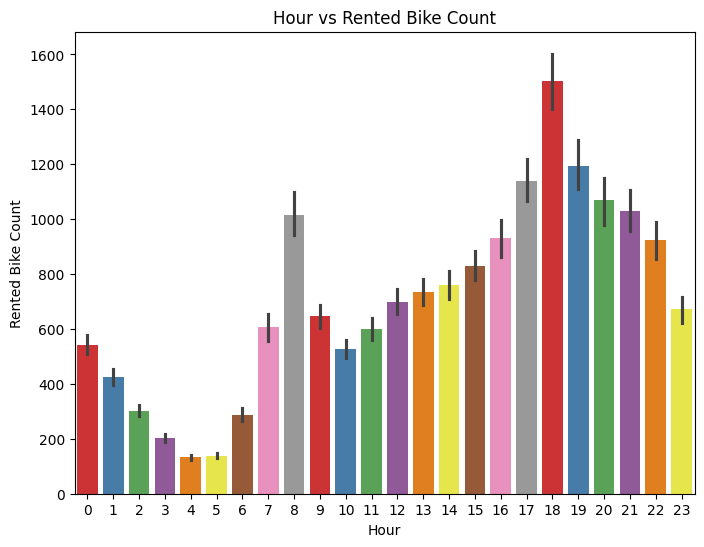

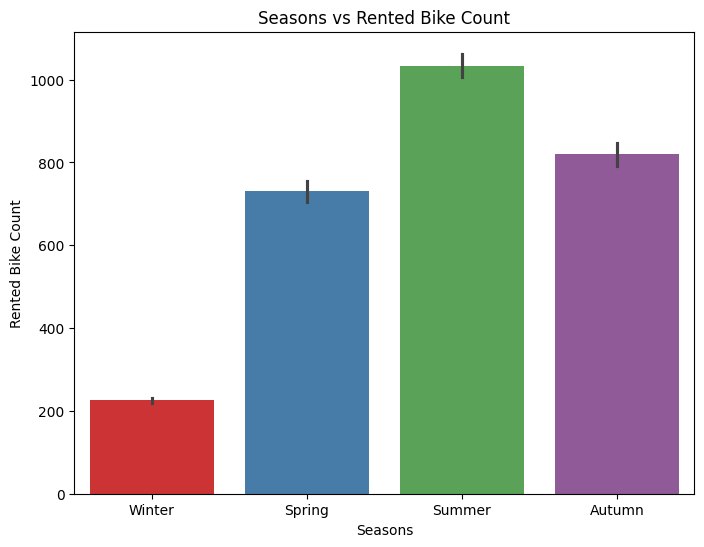

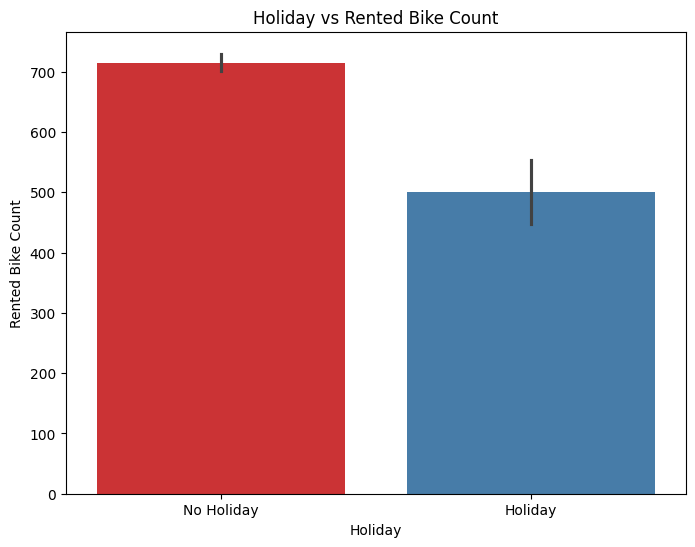

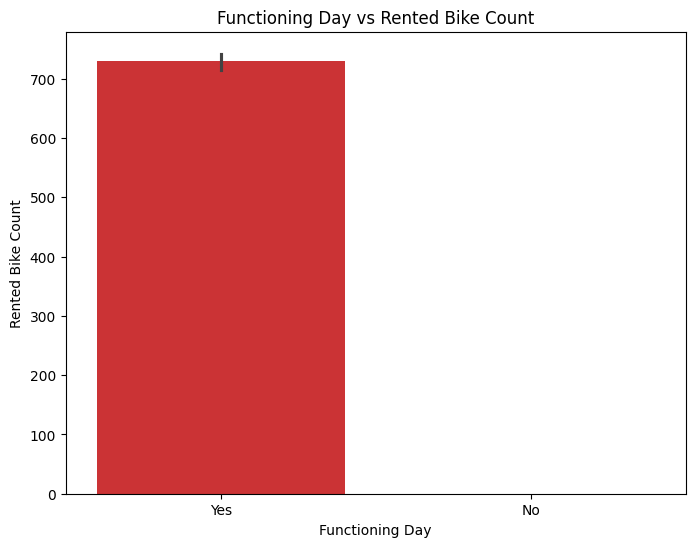

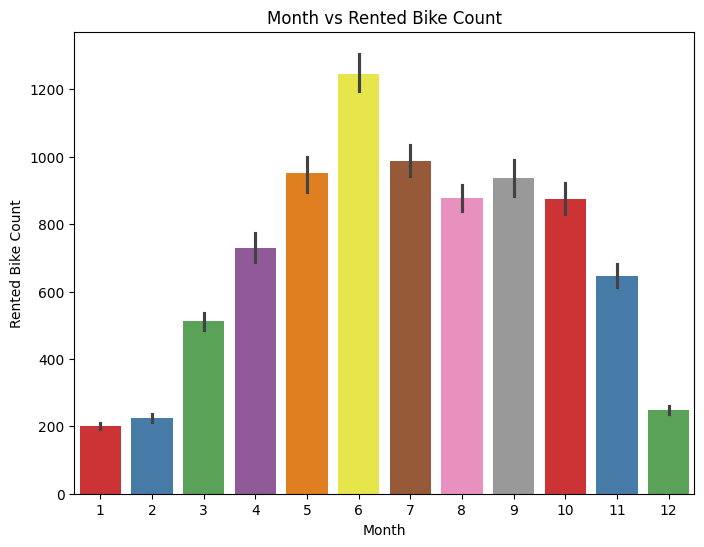

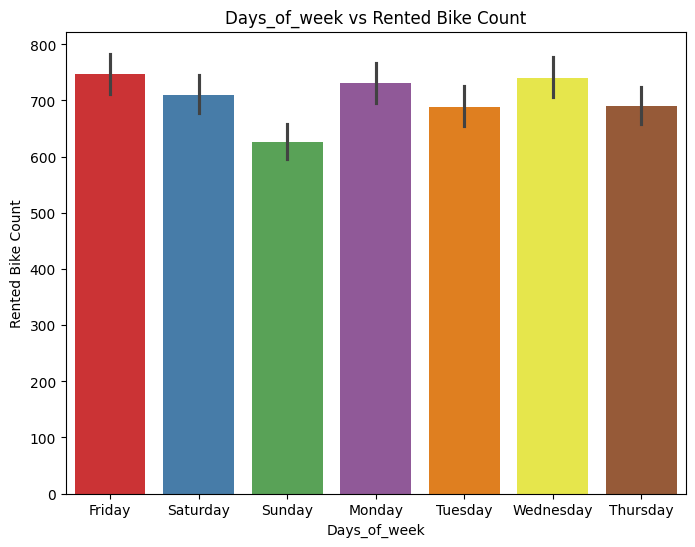

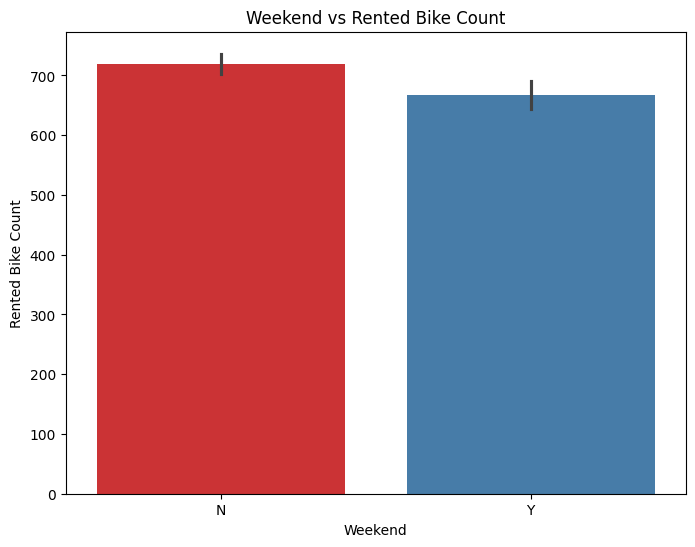

In [26]:
# Chart - 3 visualization code
# Analyzing the relationship between the dependent variable and the categorical variables
for i in cat_var:
  plt.figure(figsize=(8,6))
  sns.barplot(x=i,y=dependent_variable[0],data = bike_df, palette='Set1')
  plt.ylabel("Rented Bike Count")
  plt.xlabel(i)
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### 1. Why did you pick the specific chart?

The barplot was chosen to analyze the relationship between categorical variables and the 'Rented Bike Count' because it effectively summarizes and compares the mean rental counts across different categories. Bar plots are particularly useful for visualizing categorical data as they clearly show the differences in the target variable's average values across various groups, making it easy to spot trends and differences that could be significant. This type of visualization provides a straightforward way to interpret the impact of categorical variables on the dependent variable.

##### 2. What is/are the insight(s) found from the chart?

From these bar plots, you can derive insights into how different categories affect bike rentals. For example, certain weather conditions, seasons, or holiday statuses might show higher average bike rental counts, indicating their positive influence on demand. Conversely, categories with lower average rentals may indicate less favorable conditions for biking. These insights help identify key factors that drive usage patterns. Additionally, significant differences in means across categories suggest that these categorical variables play a crucial role in influencing the bike rental count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from these charts can help create a positive business impact. By understanding how different categorical variables affect bike rentals, the business can tailor its strategies to capitalize on high-demand periods and conditions. For instance, recognizing that bike rentals increase significantly during weekends or holidays can inform marketing campaigns and promotional activities to boost usage further during these times. Similarly, understanding the impact of weather conditions can help in resource allocation and operational planning, ensuring adequate bike availability and maintenance. These actions can enhance customer satisfaction, optimize resource use, and ultimately improve profitability.

#### Chart - 4 : Were rental services offered on non-functional days?

In [27]:
# Chart - 4 visualization code
len(bike_df[bike_df['Functioning Day']=='No'])

295

It is highly unlikely that services will be provided on non-functional days.But since there were few observations (295) recorded on those days,let's check if there were any exceptional cases.

In [28]:
# Calculating the count of rental bikes,number of holidays &non-holidays and number of records for Functioning and Non-Functioning days
bike_df.groupby(['Functioning Day','Holiday']).agg(bikerentalcounts=('Rented Bike Count','sum'),no_of_holidays_nonholidays=('Date',lambda x: x.nunique()),no_of_records=(('Date','count')))

bikerentalcounts  no_of_holidays_nonholidays  \
Functioning Day Holiday                                                    
No              Holiday                    0                           1   
                No Holiday                 0                          12   
Yes             Holiday               215895                          17   
                No Holiday           5956419                         336   

                            no_of_records  
Functioning Day Holiday                    
No              Holiday                24  
                No Holiday            271  
Yes             Holiday               408  
                No Holiday           8057

<Axes: xlabel='Functioning Day', ylabel='Rented Bike Count'>

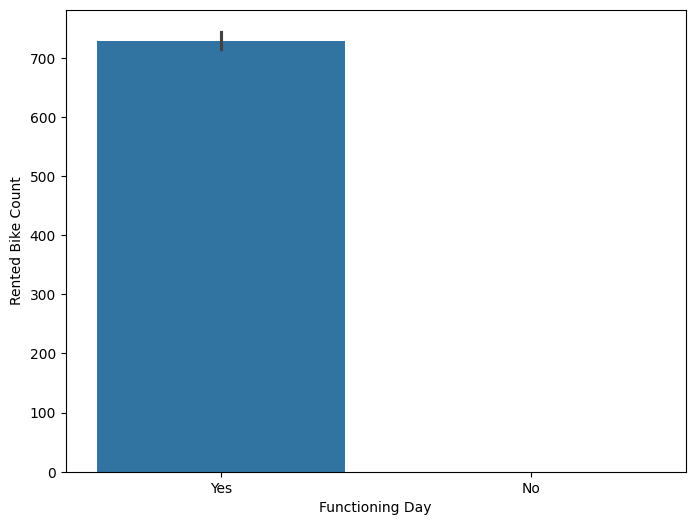

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=bike_df)

##### 1. Why did you pick the specific chart?

The barplot was chosen to visualize the relationship between 'Functioning Day' and 'Rented Bike Count' because it provides a clear comparison of average bike rentals on functioning days versus non-functioning days. Bar plots are ideal for categorical data, as they summarize the mean values of the dependent variable across different categories, making it easy to see if there's a significant difference in bike rentals between functioning and non-functioning days. This helps in quickly identifying the impact of this categorical variable on the target variable.

##### 2. What is/are the insight(s) found from the chart?

* The rental service were functional on most days during the period from Dec 2017 to Nov 2018(only 13 non-functional days)
* Although,we've observed few records on Non-Functioning Day,rental services were not offered on those days(no exceptions)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can help create a positive business impact. Understanding that bike rentals are significantly higher on functioning days underscores the importance of minimizing downtime and ensuring that bikes are well-maintained and available for use. By focusing on improving maintenance operations and reducing non-functioning periods, the business can maximize rental opportunities and revenue. Additionally, this insight can guide operational decisions, such as investing in better maintenance infrastructure or adopting preventive maintenance strategies to enhance bike availability and customer satisfaction, ultimately leading to increased profitability.

#### Chart - 5 : Which are the days on which the rental facility was unavailable?

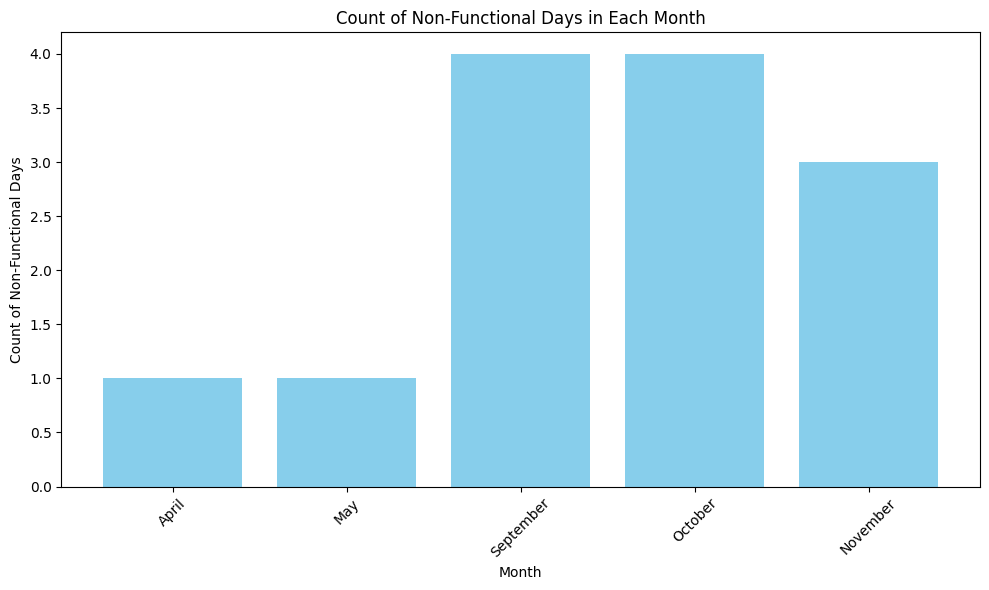

In [30]:
# Chart - 5 visualization code
# Filter for non-functional days
non_functional_days = bike_df[bike_df['Functioning Day'] == 'No']

# Drop duplicate days, keeping only one record per day
non_functional_days_unique = non_functional_days.drop_duplicates(subset='Date')

# Extract month from 'Date'
non_functional_days_unique['Month'] = non_functional_days_unique['Date'].dt.month

# Count non-functional days per month
non_functional_count = non_functional_days_unique['Month'].value_counts().sort_index()

# Month names for x-axis labels
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Ensure month names correspond to the count index
non_functional_count.index = non_functional_count.index.map(lambda x: month_names[x-1])

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(non_functional_count.index, non_functional_count.values, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Count of Non-Functional Days')
plt.title('Count of Non-Functional Days in Each Month')
plt.tight_layout()
plt.show()

In [31]:
#Holiday on which the rental service was unavailable
non_functional_days.loc[non_functional_days['Holiday']=='Holiday']['Date'].unique()

<DatetimeArray>
['2018-10-09 00:00:00']
Length: 1, dtype: datetime64[ns]

The holiday on which the rental service was not functioning is Hangeul day.It is a national Korean commemorative day marking the invention and the proclamation of Hangul , the alphabet of the Korean language

In [32]:
# No Holiday on which the rental service was unavailable
non_functional_days.loc[non_functional_days['Holiday']=='No Holiday']['Date'].value_counts().to_frame(name = 'Hours_of_non_operation').reset_index().rename(columns={'index':'Date'})

Date  Hours_of_non_operation
0  2018-04-11                      24
1  2018-05-10                      24
2  2018-09-18                      24
3  2018-09-19                      24
4  2018-09-28                      24
5  2018-09-30                      24
6  2018-10-02                      24
7  2018-10-04                      24
8  2018-11-03                      24
9  2018-11-06                      24
10 2018-11-09                      24
11 2018-10-06                       7

##### 1. Why did you pick the specific chart?

The bar plot was chosen because it is an effective visualization for comparing categorical data, such as the count of non-functional days across different months. Bar plots provide a clear and straightforward way to display frequencies, making it easy to see which months had more non-functional days at a glance. This type of chart is particularly useful for highlighting patterns or anomalies in the data, allowing for quick comparisons and interpretations.

##### 2. What is/are the insight(s) found from the chart?


The services were not for available for 1 day in the month of April,1 day in May,4 days in September,4 days in October and 3 days in November.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact. By identifying the months with the highest number of non-functional days, the business can investigate and address the underlying causes, such as maintenance issues, weather conditions, or other operational challenges. This understanding allows for better resource allocation and planning to minimize disruptions. Improving the consistency and reliability of bike availability, especially during peak months, can enhance customer satisfaction and potentially increase usage rates, leading to better overall business performance. Additionally, understanding these patterns helps in proactive planning and scheduling of maintenance activities to prevent future non-functional days.

#### Chart - 6 : What is the likelihood of people renting bikes on holidays and non-holidays?

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

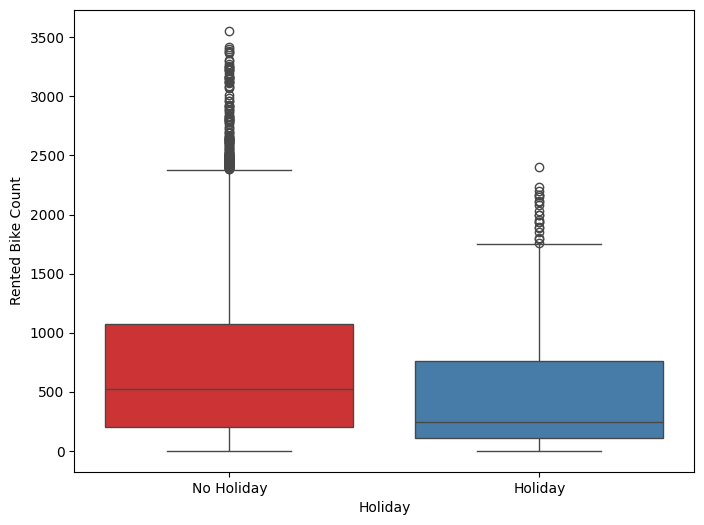

In [33]:
# Chart - 6 visualization code
plt.figure(figsize=(8,6))
sns.boxplot(x='Holiday',y='Rented Bike Count',data=bike_df,palette='Set1')

##### 1. Why did you pick the specific chart?

The box plot was chosen because it is an excellent visualization for comparing distributions and identifying differences in 'Rented Bike Count' between different categories, in this case, 'Holiday' vs. 'Non-Holiday'. Box plots provide a summary of key statistical measures, such as the median, quartiles, and potential outliers, allowing for a clear comparison of central tendencies and variability within each category. This makes it easy to see if there are any significant differences in bike rental patterns on holidays compared to non-holidays.

##### 2. What is/are the insight(s) found from the chart?

* The demand for rented bikes is higher on non-Holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the box plot can help create a positive business impact. Understanding how bike rental patterns differ between holidays and non-holidays can inform better operational planning and marketing strategies. As the data shows a significant increase in bike rentals on non-holidays, the company can allocate more bikes and resources on these days to meet higher demand and avoid shortages.The company might focus on promotional activities to boost usage on holidays. These insights enable the business to optimize resource allocation, enhance customer satisfaction, and maximize revenue opportunities.

#### Chart - 7 : What is the count of rented bikes during different seasons  over the entire period of observation?

In [34]:
# Chart - 7 visualization code
# Finding the total number of bikes rented in each season
season_df=bike_df.groupby('Seasons')['Rented Bike Count'].sum().reset_index()['Rented Bike Count'].to_frame(name = 'season_count').reset_index()

In [35]:
# Finding the total number of bikes rented in each month
month_df=(bike_df.groupby(['Seasons','Month'])['Rented Bike Count'].sum()).to_frame(name = 'month_count').reset_index()

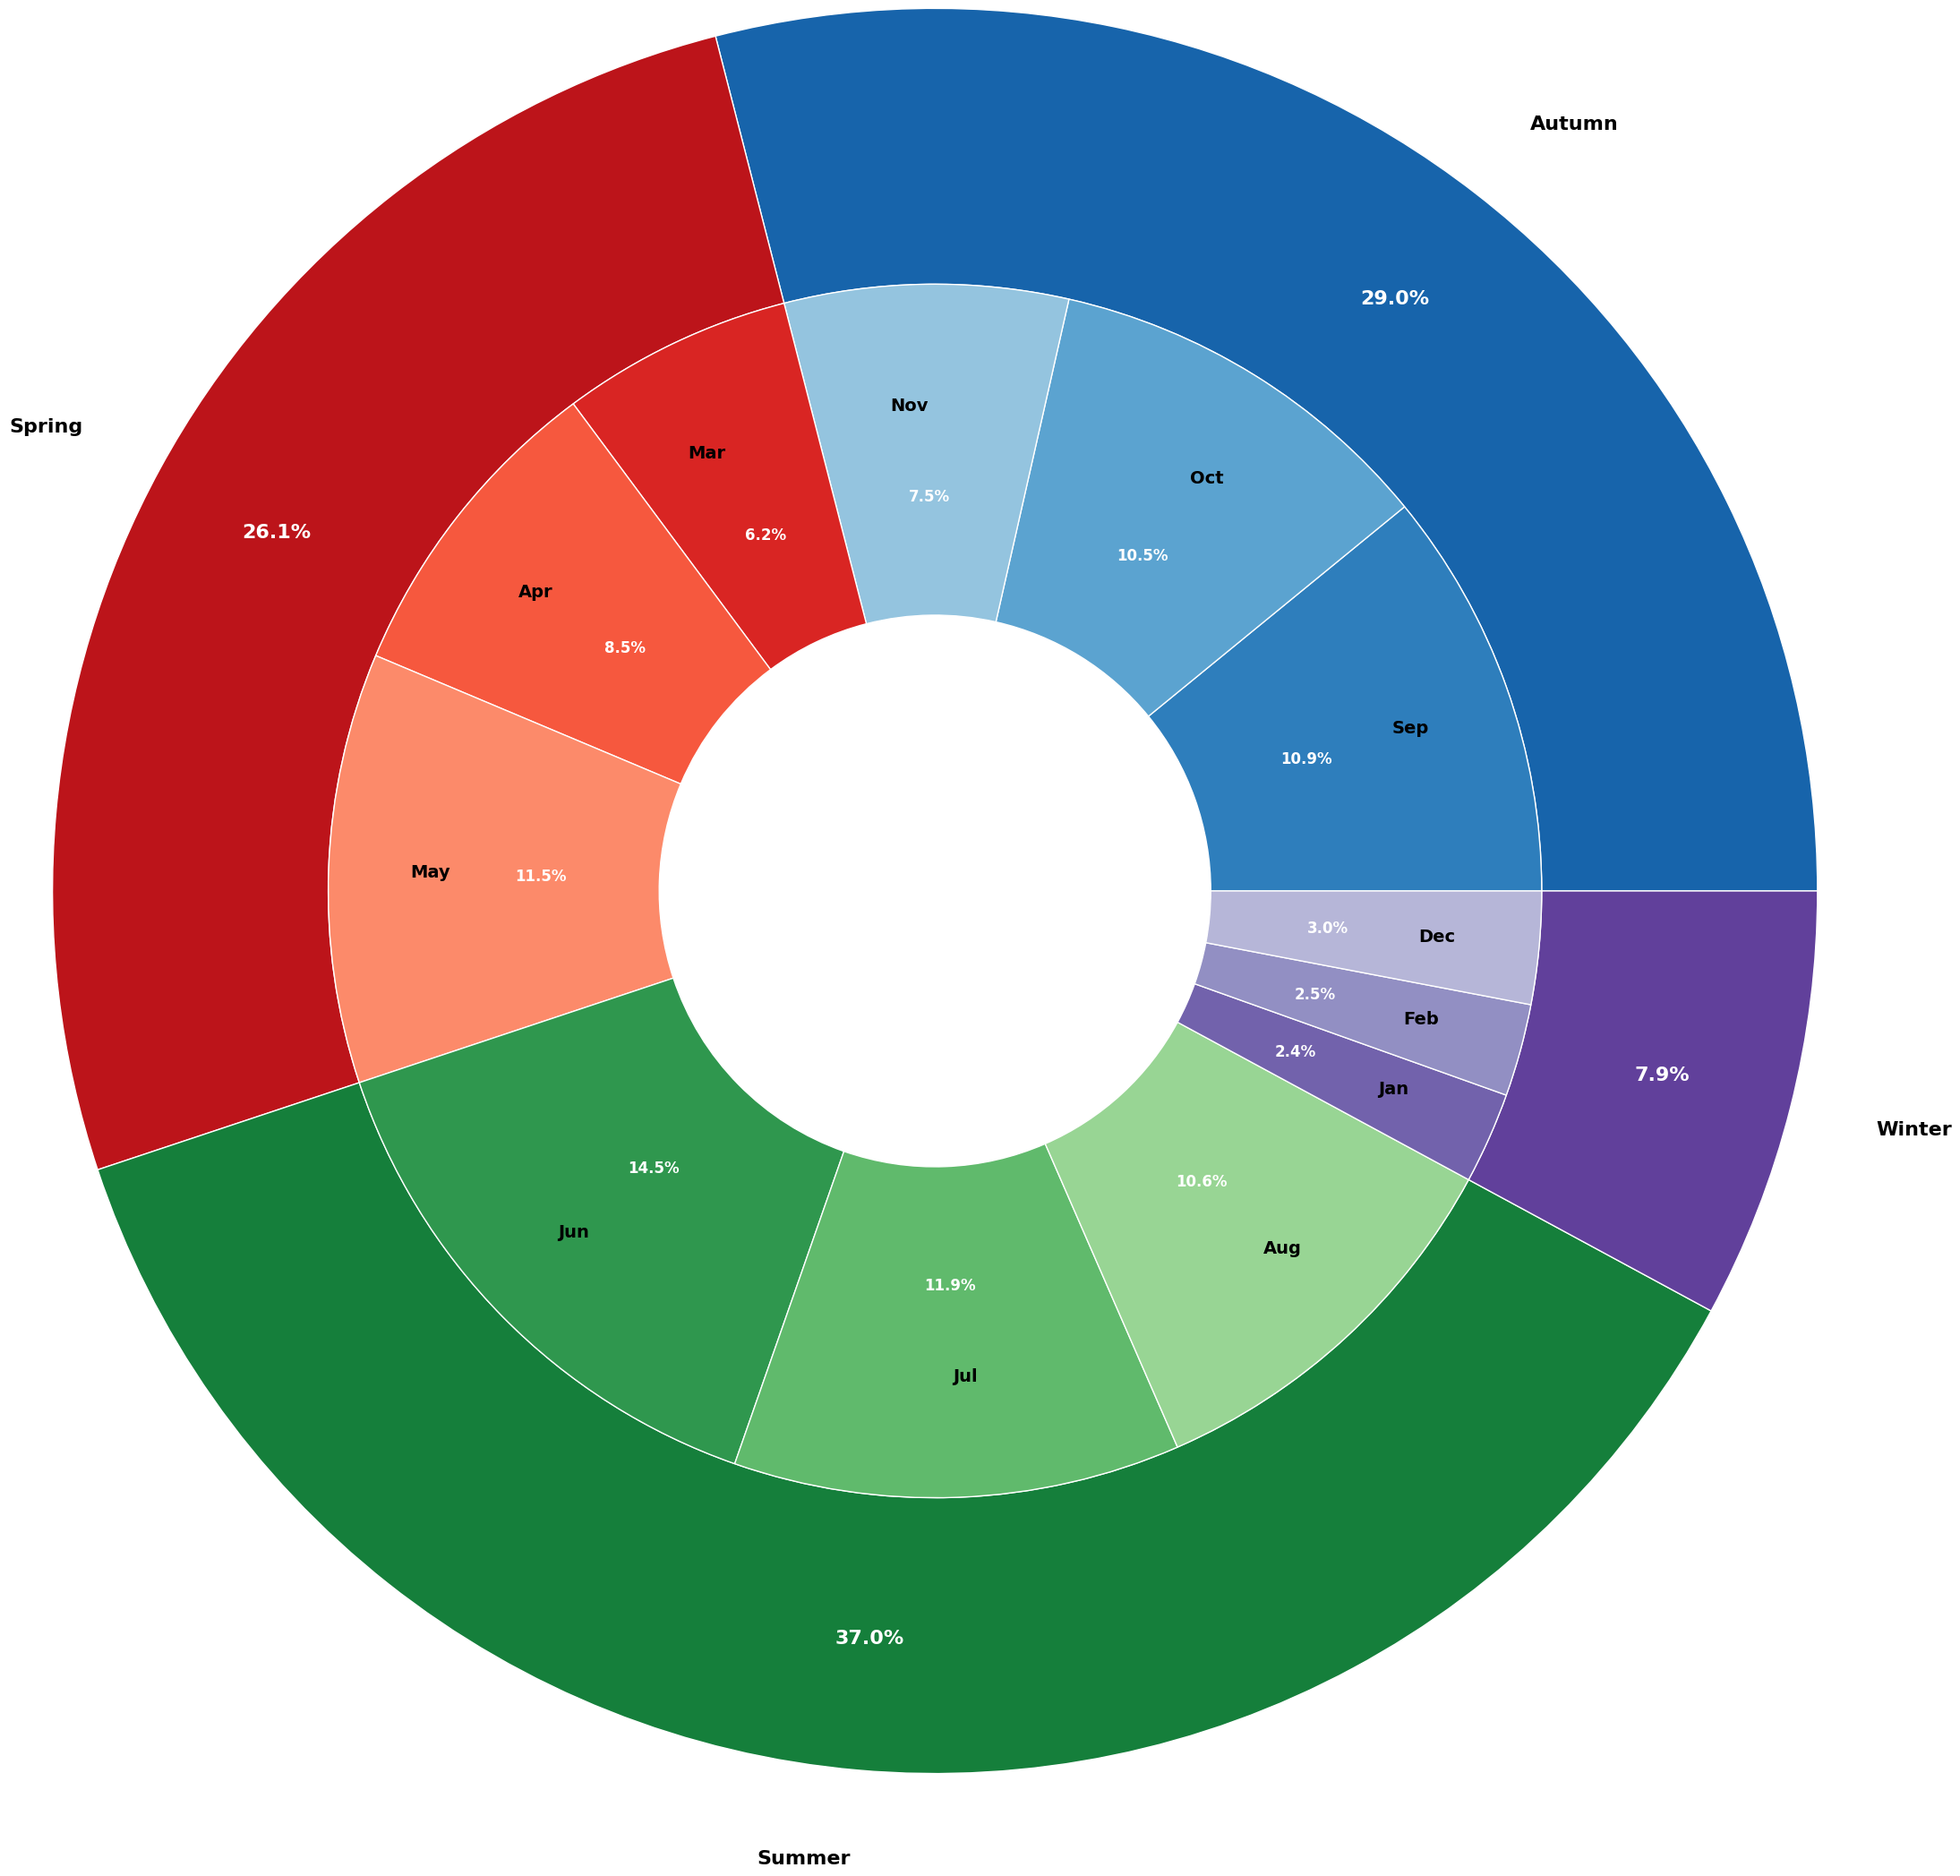

In [36]:
import calendar

# Creating a dictionary to map month numbers to month abbreviations
d = dict(enumerate(calendar.month_abbr))

# Replacing the numerical value of Month with the name of the Month
subgroup_names = month_df['Month'].map(d)

fig, ax = plt.subplots(figsize=(10, 10))  # Adding figsize for better visualization
size = 1
group_names = ['Autumn', 'Spring', 'Summer', 'Winter']
group_size = season_df['season_count']

subgroup_size = month_df['month_count']
a, b, c, d = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples]

# Setting figure colors
outer_colors = [a(0.8), b(0.8), c(0.8), d(0.8)]
inner_colors = [*a(np.linspace(0.7, 0.4, 3)), *b(np.linspace(0.7, 0.4, 3)), *c(np.linspace(0.7, 0.4, 3)), *d(np.linspace(0.7, 0.4, 3))]

# Creating nested pie chart
patches, texts, pcts = ax.pie(
    group_size,
    radius=3.2,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=group_names,
    autopct='%1.1f%%',
    textprops={'fontsize': 16},  # Use only 'fontsize'
    labeldistance=1.1,
    pctdistance=0.85
)
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)

patches1, texts1, pcts1 = ax.pie(
    subgroup_size,
    radius=3.2 - size,
    colors=inner_colors,
    labels=subgroup_names,
    wedgeprops=dict(width=1.2, edgecolor='w'),
    autopct='%1.1f%%',
    textprops={'fontsize': 14},  # Use only 'fontsize'
    labeldistance=0.8,
    pctdistance=0.65
)
plt.setp(pcts1, color='w', fontweight='bold', fontsize=12)
plt.setp(texts1, fontweight=600)

ax.set(aspect="equal")
plt.show()


##### 1. Why did you pick the specific chart?

The nested pie chart, also known as a sunburst chart, was chosen because it effectively displays hierarchical data, showing the relationship between different levels of categories. In this case, it visualizes the distribution of non-functional days across seasons and months, providing a comprehensive view of how non-functional days are distributed throughout the year. This type of chart is particularly useful for illustrating the proportion of non-functional days in each month within each season, allowing for a clear and detailed comparison.

##### 2. What is/are the insight(s) found from the chart?

* The demand for rental bikes is lowest during Winters(Dec-Feb),highest during Summers(June-August)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can lead to a positive business impact.  As the winter season show a low number of rentals, the company can investigate the underlying causes, such as weather conditions, maintenance schedules, or staffing issues. Addressing these specific problems can improve the reliability of bike availability, enhance customer satisfaction, and potentially increase usage rates during peak seasons. Additionally, this detailed understanding allows for better planning and resource allocation, ensuring that maintenance and operational strategies are effectively aligned with demand patterns.

#### Chart - 8 : What is the demand for rental bikes during different days of the week?

<Axes: xlabel='Days_of_week', ylabel='Rented Bike Count'>

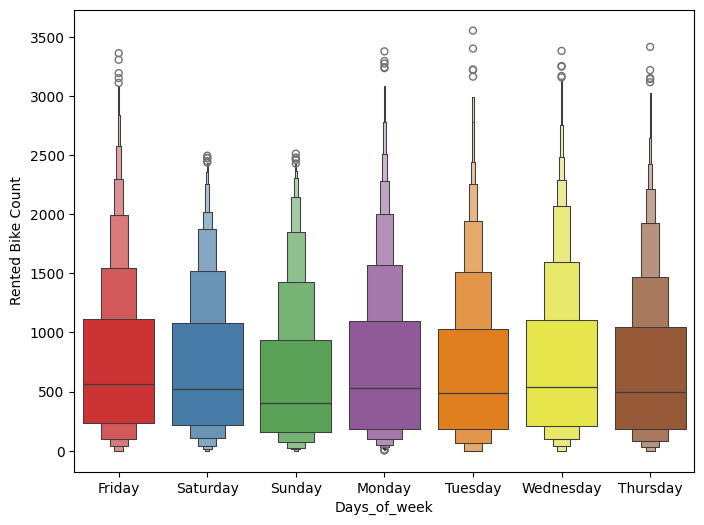

In [37]:
# Chart - 8 visualization code
plt.figure(figsize=(8,6))
sns.boxenplot(x='Days_of_week',y='Rented Bike Count',data=bike_df,palette='Set1')

##### 1. Why did you pick the specific chart?

The boxen plot was chosen because it is particularly effective for visualizing distributions of data, especially when dealing with larger datasets and the need to understand the spread, central tendency, and potential outliers. It provides more detail than a standard box plot by showing the distribution across multiple quantiles, making it ideal for examining how 'Rented Bike Count' varies across different days of the week. This allows for a nuanced understanding of rental patterns and identifies specific days with higher or lower bike usage.

##### 2. What is/are the insight(s) found from the chart?


* Least demand on Sunday,Slightly higher demand on Friday
* More demand on weekdays than weekends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the boxen plot can help create a positive business impact. Understanding how bike rentals vary by day of the week enables the business to optimize operations and resource allocation. For instance, if weekdays consistently show higher bike rentals, the company can ensure more bikes are available and maintained for these peak periods, enhancing customer satisfaction and maximizing revenue. Conversely, identifying days with lower rentals can help in planning promotions or targeted campaigns to boost usage on those days. Overall, these insights support data-driven decision-making, leading to improved service efficiency and customer experience.








#### Chart - 9 : What is the demand for rental bikes during weekdays and weekends?

<Axes: xlabel='Weekend', ylabel='Rented Bike Count'>

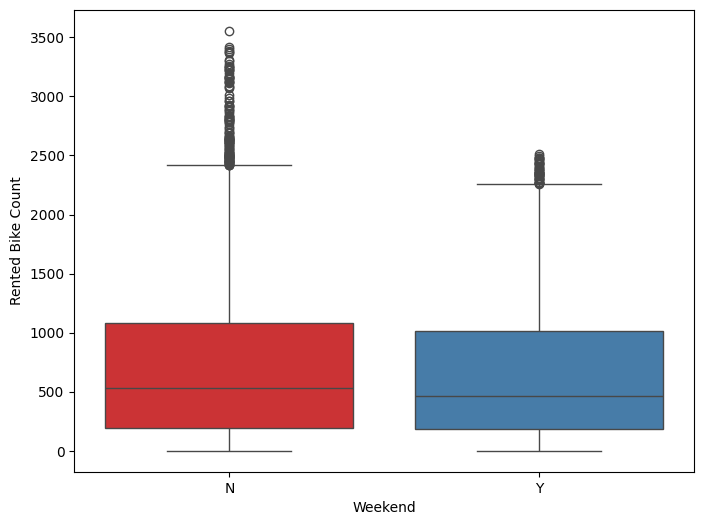

In [38]:
# Chart - 9 visualization code
plt.figure(figsize=(8,6))
sns.boxplot(x='Weekend',y='Rented Bike Count',data=bike_df,palette='Set1')

In [39]:
bike_df.groupby(['Weekend'])['Rented Bike Count'].mean()

Weekend
N    719.448914
Y    667.342147
Name: Rented Bike Count, dtype: float64

##### 1. Why did you pick the specific chart?

The box plot was chosen for this visualization because it effectively compares the distribution of bike rentals between weekends and weekdays. Box plots provide a clear summary of the data through medians, quartiles, and potential outliers, which helps in understanding the central tendency, spread, and variability within each category. This makes it ideal for identifying any significant differences in bike rental patterns between weekends and weekdays.

##### 2. What is/are the insight(s) found from the chart?

* The average demand for rental bikes is lower on Weekends(Sat-Sun) as compared to Weekdays(Mon-Fri).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the box plot can help create a positive business impact. By understanding that bike rentals are higher on weekdays, the business can allocate more bikes and resources during these days to meet the increased demand, ensuring better customer service and availability. This can also help in planning maintenance schedules to ensure that bikes are in good condition for the peak rental periods. Additionally, marketing strategies can be tailored to promote bike rentals on weekends, capitalizing on the higher usage trends. Overall, these insights enable better resource management, operational efficiency, and customer satisfaction, leading to improved business outcomes.

#### Chart - 10 : What is the demand for rental bikes during different hours of the day?

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

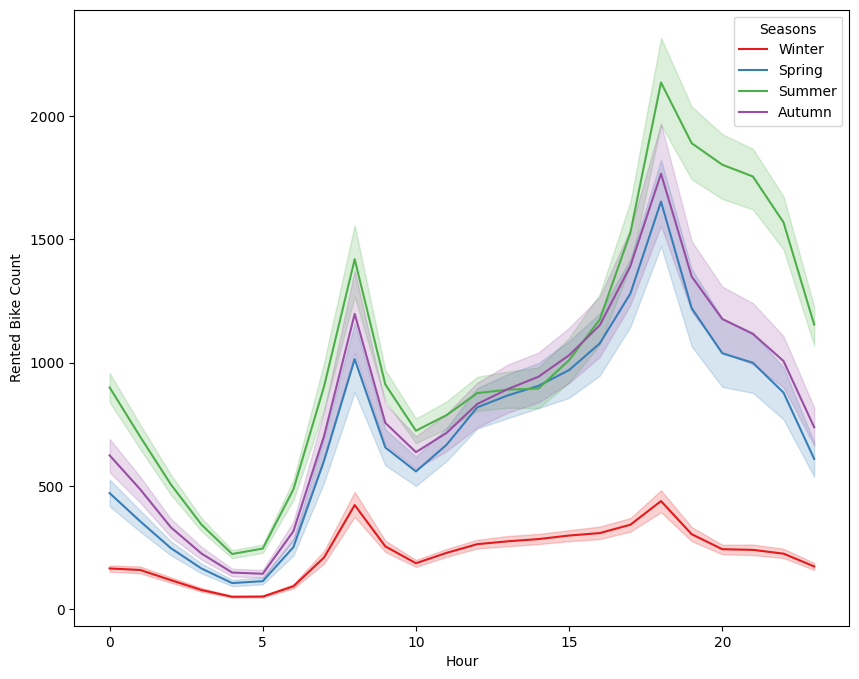

In [40]:
# Chart - 10 visualization code
plt.figure(figsize=(10,8))
sns.lineplot(x='Hour',y='Rented Bike Count',data=bike_df,palette='Set1',hue='Seasons',lw=1.5)

##### 1. Why did you pick the specific chart?

The line plot was chosen because it effectively displays trends and patterns over a continuous variable, in this case, the 'Hour' of the day. By using 'Rented Bike Count' as the y-axis and 'Hour' as the x-axis, the line plot can show how bike rentals fluctuate throughout the day. Adding a hue for 'Seasons' allows for the comparison of these hourly trends across different seasons, providing a multi-dimensional view of the data. This helps in visualizing time-based trends and seasonal variations in bike rentals clearly.

##### 2. What is/are the insight(s) found from the chart?

* The demand for rental bikes  peaks at 8 (8:00 am) and 18 (6:00 PM ).
* This peak in demand coincides with opening and closing hours of various institutions and offices.
* The demand for rental bikes increases steadily after 10:00 AM and continues till 6:00 PM
* The demand for bikes is least during the early hours (1:00 AM to 6:00 AM)
* Regardless,of the seasons,this has been the general trend noticed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this line plot can significantly impact business positively. Understanding hourly and seasonal trends in bike rentals allows for better resource allocation and operational planning. For example, the business can ensure more bikes are available during peak hours and seasons with higher demand, improving customer satisfaction by reducing wait times and bike shortages. Additionally, these insights can inform targeted marketing campaigns, promoting bike rentals during off-peak hours or less popular seasons to balance demand. Overall, this data-driven approach enhances service efficiency, optimizes inventory management, and maximizes revenue potential.

#### Chart - 11 : What is the variation of  Rented bikes count over the entire period of observation based on various factors?

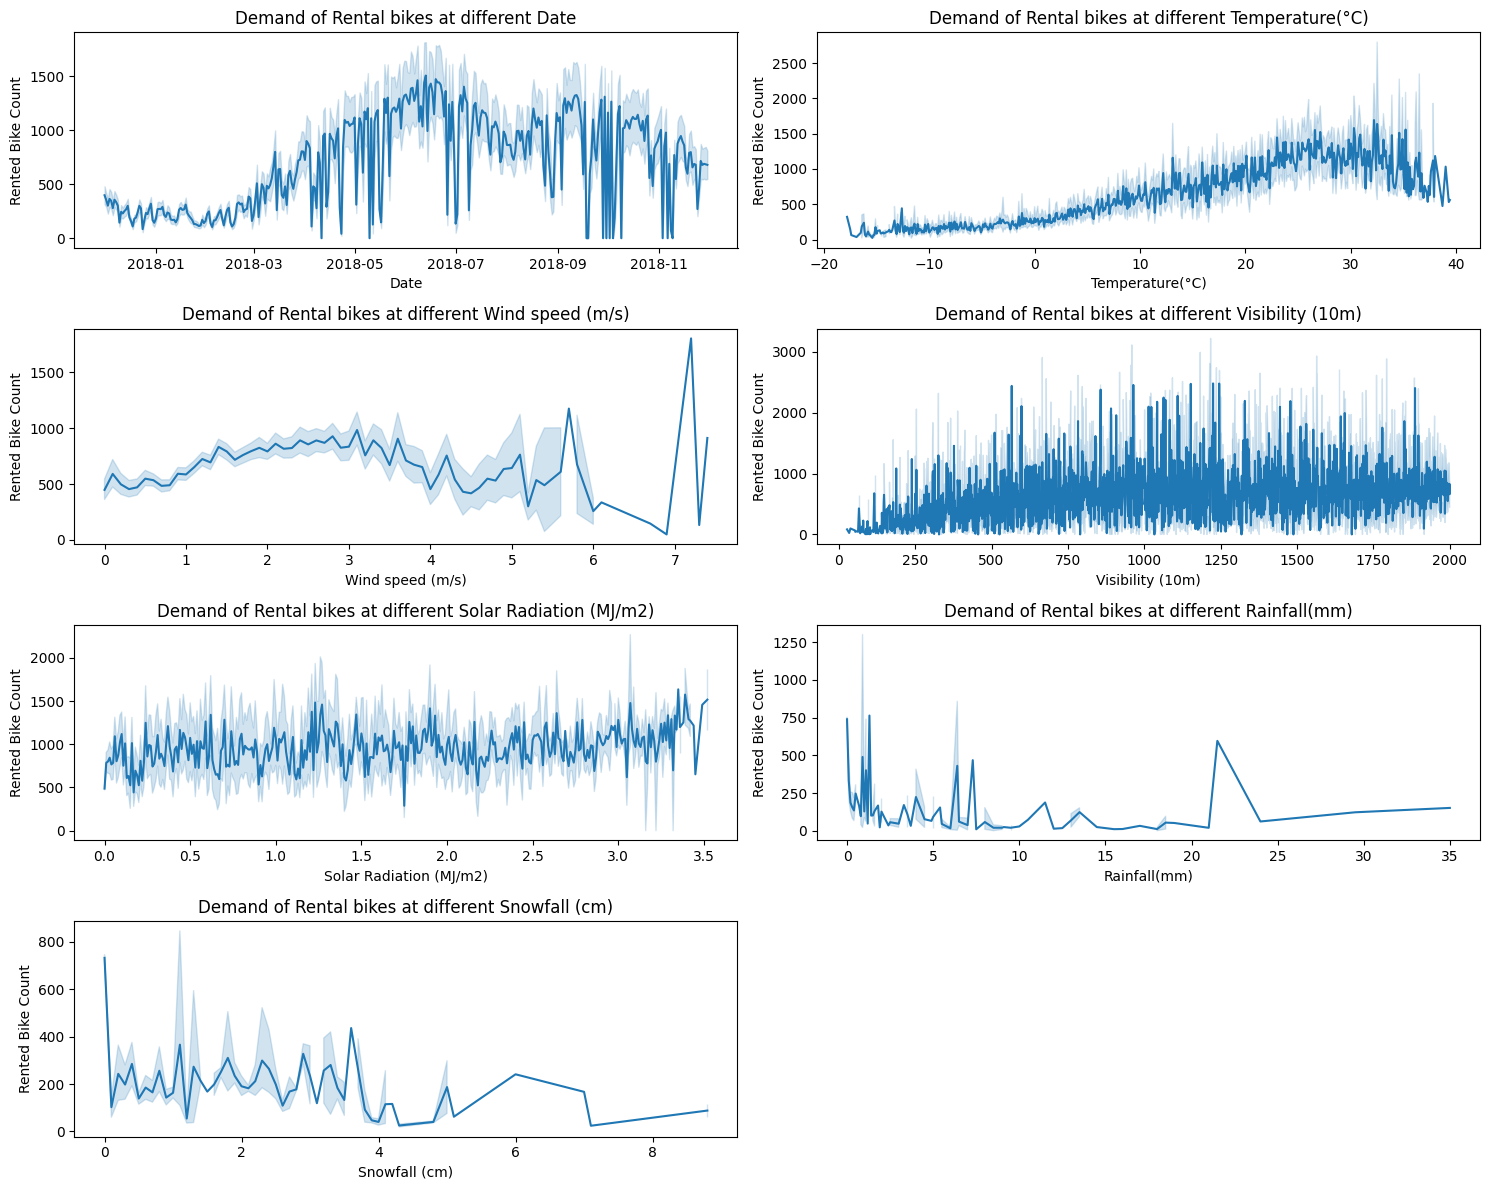

In [41]:
# Chart - 11 visualization code
fig = plt.figure(figsize=(15,12))
c=1
cont = ['Date','Temperature(°C)',	'Wind speed (m/s)',	'Visibility (10m)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)']
for i in cont:
  plt.subplot(4,2,c)
  sns.lineplot(x=i,y='Rented Bike Count',data=bike_df,palette='inferno')
  plt.title('Demand of Rental bikes at different {}'.format(i))
  c = c + 1
plt.tight_layout()

Inspecting the observations where there is a peak in demand for bikes regardless of the weather conditions

In [42]:
#1.Rainfall
bike_df[(bike_df['Rainfall(mm)'] >=20) & (bike_df['Rainfall(mm)'] <=25)]

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
5034 2018-06-28                596    18             20.6           97   
5132 2018-07-02                 61    20             23.5           97   
6524 2018-08-29                 19    20             23.4           98   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
5034               0.7               222                       20.1   
5132               0.1              1814                       22.9   
6524               0.6                70                       23.0   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
5034                     0.14          21.5            0.0  Summer   
5132                     0.04          24.0            0.0  Summer   
6524                     0.00          21.0            0.0  Summer   

         Holiday Functioning Day  Month Days_of_week  Year  Day Weekend  
5034  No Holiday             Yes      6     Thursday  2018   28       N  
5132  No Holiday             Yes      7       Monday  2018    2       N  
6524  No Holiday             Yes      8    Wednesday  2018   29       N

* These are Working days

In [43]:
bike_df[(bike_df['Snowfall (cm)'] >=5) & (bike_df['Snowfall (cm)'] <=8)]

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
420  2017-12-18                 62    12             -1.8           83   
421  2017-12-18                 76    13             -0.9           84   
8601 2018-11-24                 24     9              0.3           97   
8604 2018-11-24                167    12              2.5           84   
8605 2018-11-24                241    13              2.6           83   
8606 2018-11-24                298    14              3.0           82   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
420                1.2               351                       -4.3   
421                1.2               333                       -3.2   
8601               3.0                34                       -0.1   
8604               1.9              1538                        0.0   
8605               1.9              1774                        0.0   
8606               1.7              1589                        0.2   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
420                      0.09           1.1            5.1  Winter   
421                      0.09           0.0            5.0  Winter   
8601                     0.00           9.1            7.1  Autumn   
8604                     0.40           1.8            7.0  Autumn   
8605                     0.84           0.0            6.0  Autumn   
8606                     0.55           0.0            5.0  Autumn   

         Holiday Functioning Day  Month Days_of_week  Year  Day Weekend  
420   No Holiday             Yes     12       Monday  2017   18       N  
421   No Holiday             Yes     12       Monday  2017   18       N  
8601  No Holiday             Yes     11     Saturday  2018   24       Y  
8604  No Holiday             Yes     11     Saturday  2018   24       Y  
8605  No Holiday             Yes     11     Saturday  2018   24       Y  
8606  No Holiday             Yes     11     Saturday  2018   24       Y

* These are Working days

##### 1. Why did you pick the specific chart?

The line plots were chosen for their ability to effectively show the relationship between 'Rented Bike Count' and various continuous weather-related variables over time. By plotting multiple line plots in a single figure, we can compare how different factors such as temperature, wind speed, visibility, solar radiation, rainfall, and snowfall impact bike rentals. This approach allows for a comprehensive and simultaneous examination of multiple variables, making it easier to identify trends and correlations in the data.

##### 2. What is/are the insight(s) found from the chart?


*   **Temperature vs Bike count plot** : The demand is higher during warmer temperatures (25°C-30°C)
*   **Windspeed vs Bike count plot** : The demand for rental bikes is   relatively uniform over all windspeeds upto 5 m/s .Beyond that speed,we observe a higher demand for bikes.
*   **Visibility vs Bike count plot** : The count of bikes rented is few on times when the visibility is extremely low,less than 1000m.
*   **Solar radiation vs Bike count plot**:There is an overall increase in the demand with increase in Solar radiation.
*   **Rainfall vs Bike count plot** : The peak between 20 mm and 25 mm seems out of place,on refering to the dataset we find that such observations are recorded during Summer Season.However,people still continue to opt for rental bikes,since they have to go to work (No Holiday).
*   **Snowfall vs Bike count plot** : The demand for bikes is comparatively lower when the snowfall received is 4 cm and above.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from these line plots can help create a positive business impact. By understanding the relationship between bike rentals and weather conditions, the business can better anticipate demand and adjust operations accordingly. For example, knowing that rentals drop during rainy or snowy days can lead to the development of strategies to mitigate this, such as offering promotions or incentives during adverse weather. Additionally, recognizing peak rental periods during favorable weather conditions can help ensure adequate bike availability, enhancing customer satisfaction and optimizing revenue. These data-driven insights enable the business to make informed decisions, improve service delivery, and tailor marketing efforts effectively.

#### Chart - 12 : What are the factors which influence the demand for rental bikes during a day?

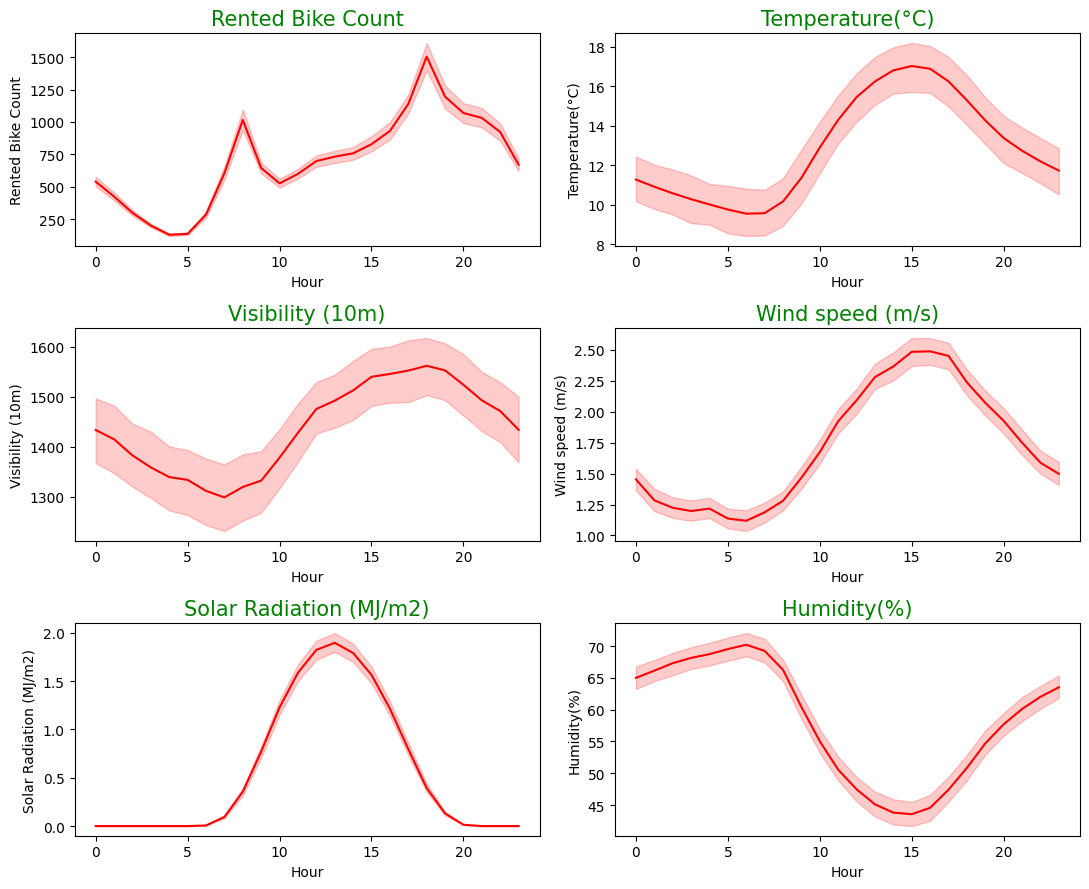

In [44]:
# Chart - 12 visualization code
fig = plt.figure(figsize=(11,9))
c=1
columns=['Rented Bike Count','Temperature(°C)','Visibility (10m)', 'Wind speed (m/s)','Solar Radiation (MJ/m2)', 'Humidity(%)']
for i in columns :
    plt.subplot(3,2,c)
    plt.ylabel(i)
    plt.title(label=i,fontsize=15,color="green")
    sns.lineplot(data=bike_df, x='Hour', y=i, color='r')
    c = c + 1
plt.tight_layout()

##### 1. Why did you pick the specific chart?

The line plots were chosen to visualize how various factors, including bike rentals and weather-related variables, change throughout the day. By plotting each variable against the hour of the day, the line plots can effectively illustrate daily patterns and trends. This approach allows for a clear and concise comparison of different factors, helping to identify any cyclical patterns or correlations between the variables over a 24-hour period.

##### 2. What is/are the insight(s) found from the chart?

* Temperature, visibility, windspeed, and solar radiation appear to be positively associated to the hourly demand for rental bikes.
* The rented bike counts are highest during the hours from 7:00 AM to 20.00 (8:00 PM), when the temperature is highest, there is the most visibility, windspeed, and humidity is lowest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from these line plots can significantly impact business positively. By understanding the daily patterns in bike rentals and their relationship with weather conditions, the business can better predict demand and manage resources effectively. For instance, knowing the peak hours for bike rentals allows for strategic placement and maintenance of bikes to ensure availability and minimize downtime. Additionally, recognizing how weather conditions like temperature and solar radiation influence rentals can help in planning promotions or providing weather-appropriate biking accessories. These data-driven insights support optimized operational planning, enhanced customer service, and targeted marketing efforts, ultimately leading to increased customer satisfaction and business growth.

#### Chart - 13 : What are the factors which influence the demand for rental bikes during different months?

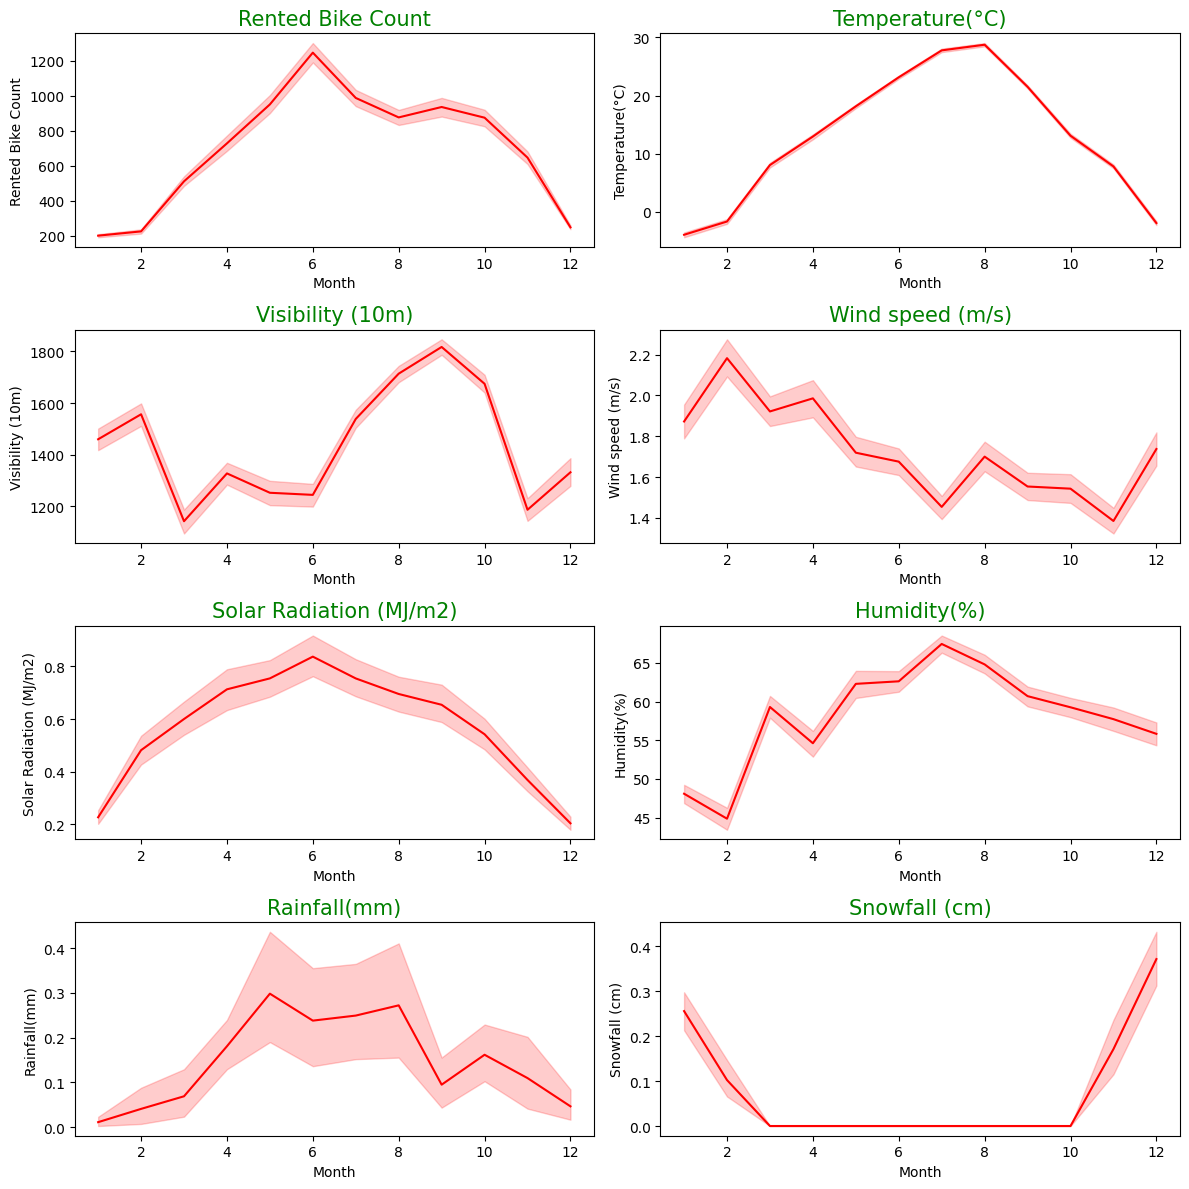

In [45]:
# Chart - 13 visualization code
fig = plt.figure(figsize=(12,12))
c=1
columns=['Rented Bike Count','Temperature(°C)','Visibility (10m)', 'Wind speed (m/s)','Solar Radiation (MJ/m2)', 'Humidity(%)','Rainfall(mm)','Snowfall (cm)']
for i in columns :
    plt.subplot(4,2, c)
    plt.ylabel(i)
    plt.title(label=i,fontsize=15,color="green")
    sns.lineplot(data=bike_df, x='Month', y=i, color='r')
    c = c + 1
plt.tight_layout()

##### 1. Why did you pick the specific chart?

The line plots were chosen to visualize how various factors, including bike rentals and weather-related variables, change over the months of the year. By plotting each variable against the month, the line plots can effectively illustrate seasonal patterns and trends. This approach allows for a clear and concise comparison of different factors, helping to identify any cyclical patterns or correlations between the variables over the course of a year.

##### 2. What is/are the insight(s) found from the chart?

* The monthly count of rented bikes is positively associated with Temperature.
* Snowfall movement coincides with season, with heavy snowfall from December to February throughout the winter season. There's a decline in count of rented bikes during these months.
* Rainfall tends to be more frequent in Seoul from June to August, during the summer season.However,this has not lead to decline in demand for rental bikes during those months.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from these line plots can significantly impact the business positively. By understanding the monthly patterns in bike rentals and their relationship with weather conditions, the business can better predict demand and manage resources effectively. For instance, knowing the peak months for bike rentals allows for strategic planning of bike availability and maintenance schedules. Additionally, recognizing how weather conditions like temperature and rainfall influence rentals can help in planning seasonal promotions or providing weather-appropriate biking accessories. These data-driven insights support optimized operational planning, enhanced customer service, and targeted marketing efforts, ultimately leading to increased customer satisfaction and business growth.

#### Chart - 14 : What are the factors which influence the demand for rental bikes during various seasons of the year?

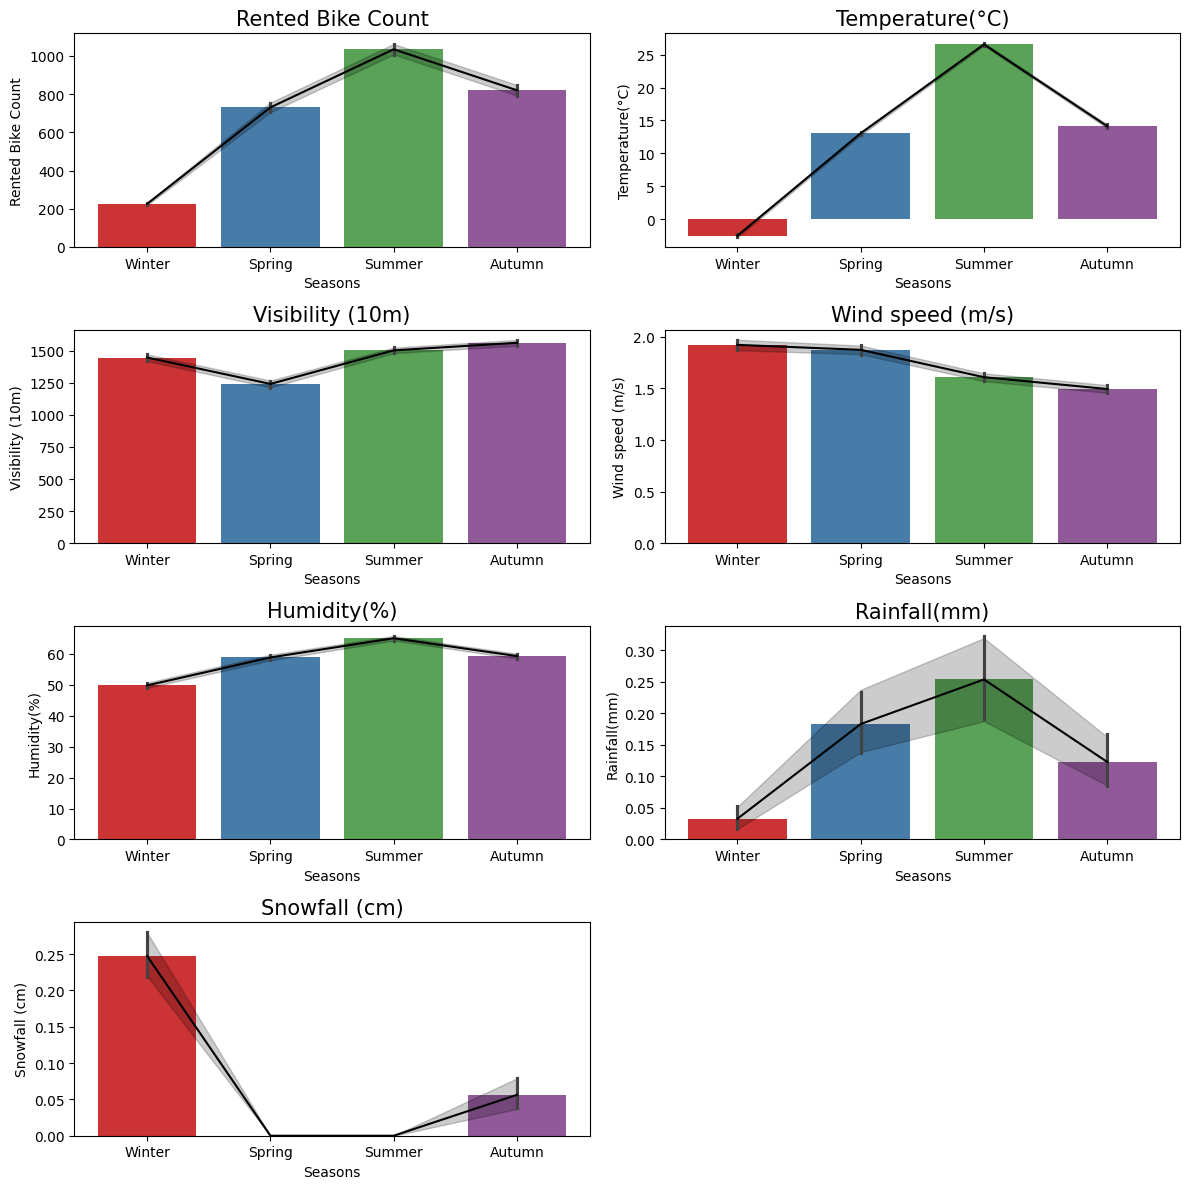

In [46]:
# Chart - 14 visualization code
fig = plt.figure(figsize=(12,12))
c=1
columns=['Rented Bike Count','Temperature(°C)','Visibility (10m)', 'Wind speed (m/s)', 'Humidity(%)','Rainfall(mm)', 'Snowfall (cm)']
for i in columns :
    plt.subplot(4,2,c)
    plt.ylabel(i)
    plt.title(label=i,fontsize=15,color="black")
    sns.barplot(data=bike_df, x='Seasons', y=i, palette='Set1')
    sns.lineplot(data=bike_df, x='Seasons', y=i, color='black')
    c = c + 1
plt.tight_layout()

##### 1. Why did you pick the specific chart?

The combination of bar plots and line plots was chosen to visualize the seasonal variations in bike rentals and weather-related variables. Bar plots provide a clear depiction of the average values for each season, while the line plots superimposed on the bar plots highlight trends and potential fluctuations within the seasons. This dual approach offers a comprehensive view, enabling a straightforward comparison of different factors across seasons.

##### 2. What is/are the insight(s) found from the chart?

* It is evident that the seasonal demand for rental bikes is positively associated with temperature, solar radiation ,rainfall ,humidity and is negatively related with Snowfall received.
* Therefore,the demand is highest during Summer season and least during winters



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from these combined plots can significantly benefit the business. By understanding how bike rentals and weather conditions vary by season, the business can better forecast demand and optimize resource allocation. For instance, knowing that bike rentals peak in certain seasons allows for strategic planning of inventory, maintenance, and staffing. Additionally, recognizing how weather conditions influence rentals can inform marketing strategies and operational adjustments, such as offering seasonal promotions or ensuring bikes are well-maintained during high-demand periods. These data-driven insights support efficient operational planning, enhanced customer service, and targeted marketing efforts, ultimately driving customer satisfaction and business growth.

#### Chart - 15 - Correlation Heatmap

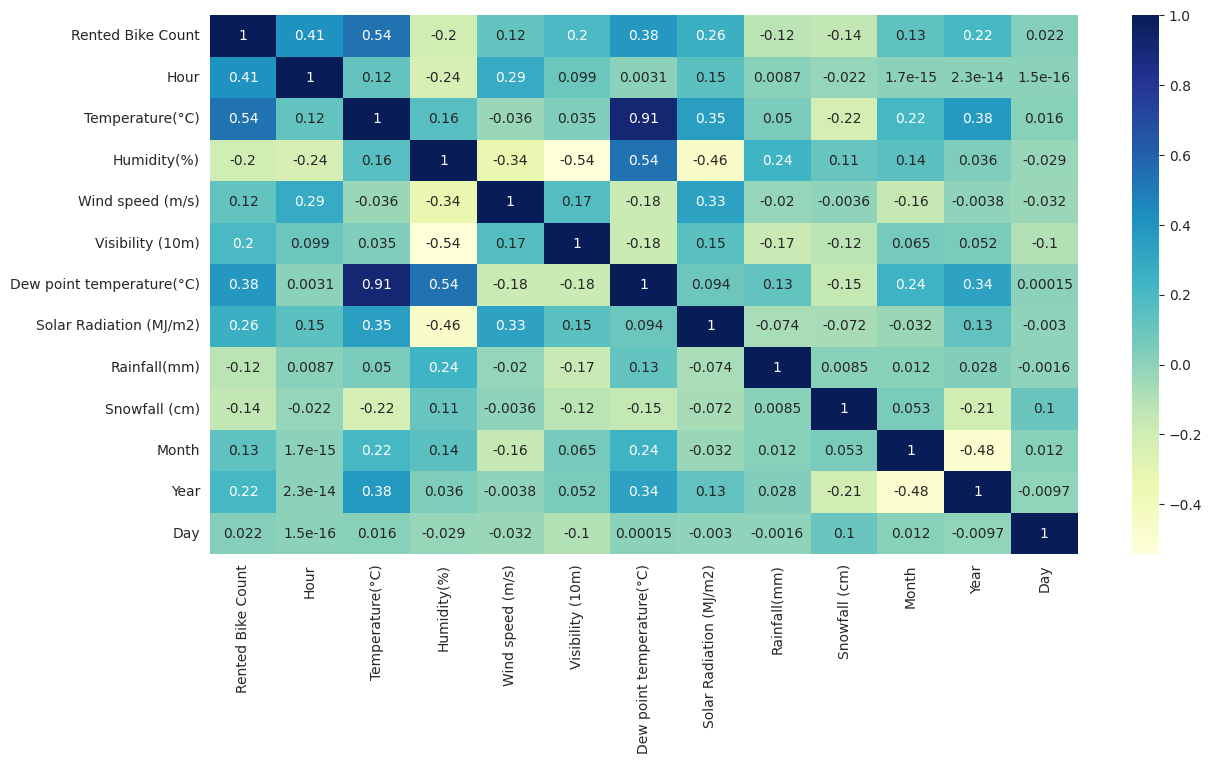

In [47]:
# Chart - 15 visualization code
# Select only numeric columns for correlation matrix
numeric_cols = bike_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_cols.corr()

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14,7))
    ax = sns.heatmap(corr , annot = True, cmap="YlGnBu")

##### 1. Why did you pick the specific chart?

A heatmap provides a visual representation of correlation coefficients between pairs of variables.Each cell in the table shows the correlation between two variables.

##### 2. What is/are the insight(s) found from the chart?

* Dew point temperature is strongly correlated with temperature.
* Temperature,Hour shares a stronger correlation with Rented Bike count.


#### Chart - 16 - Pair Plot

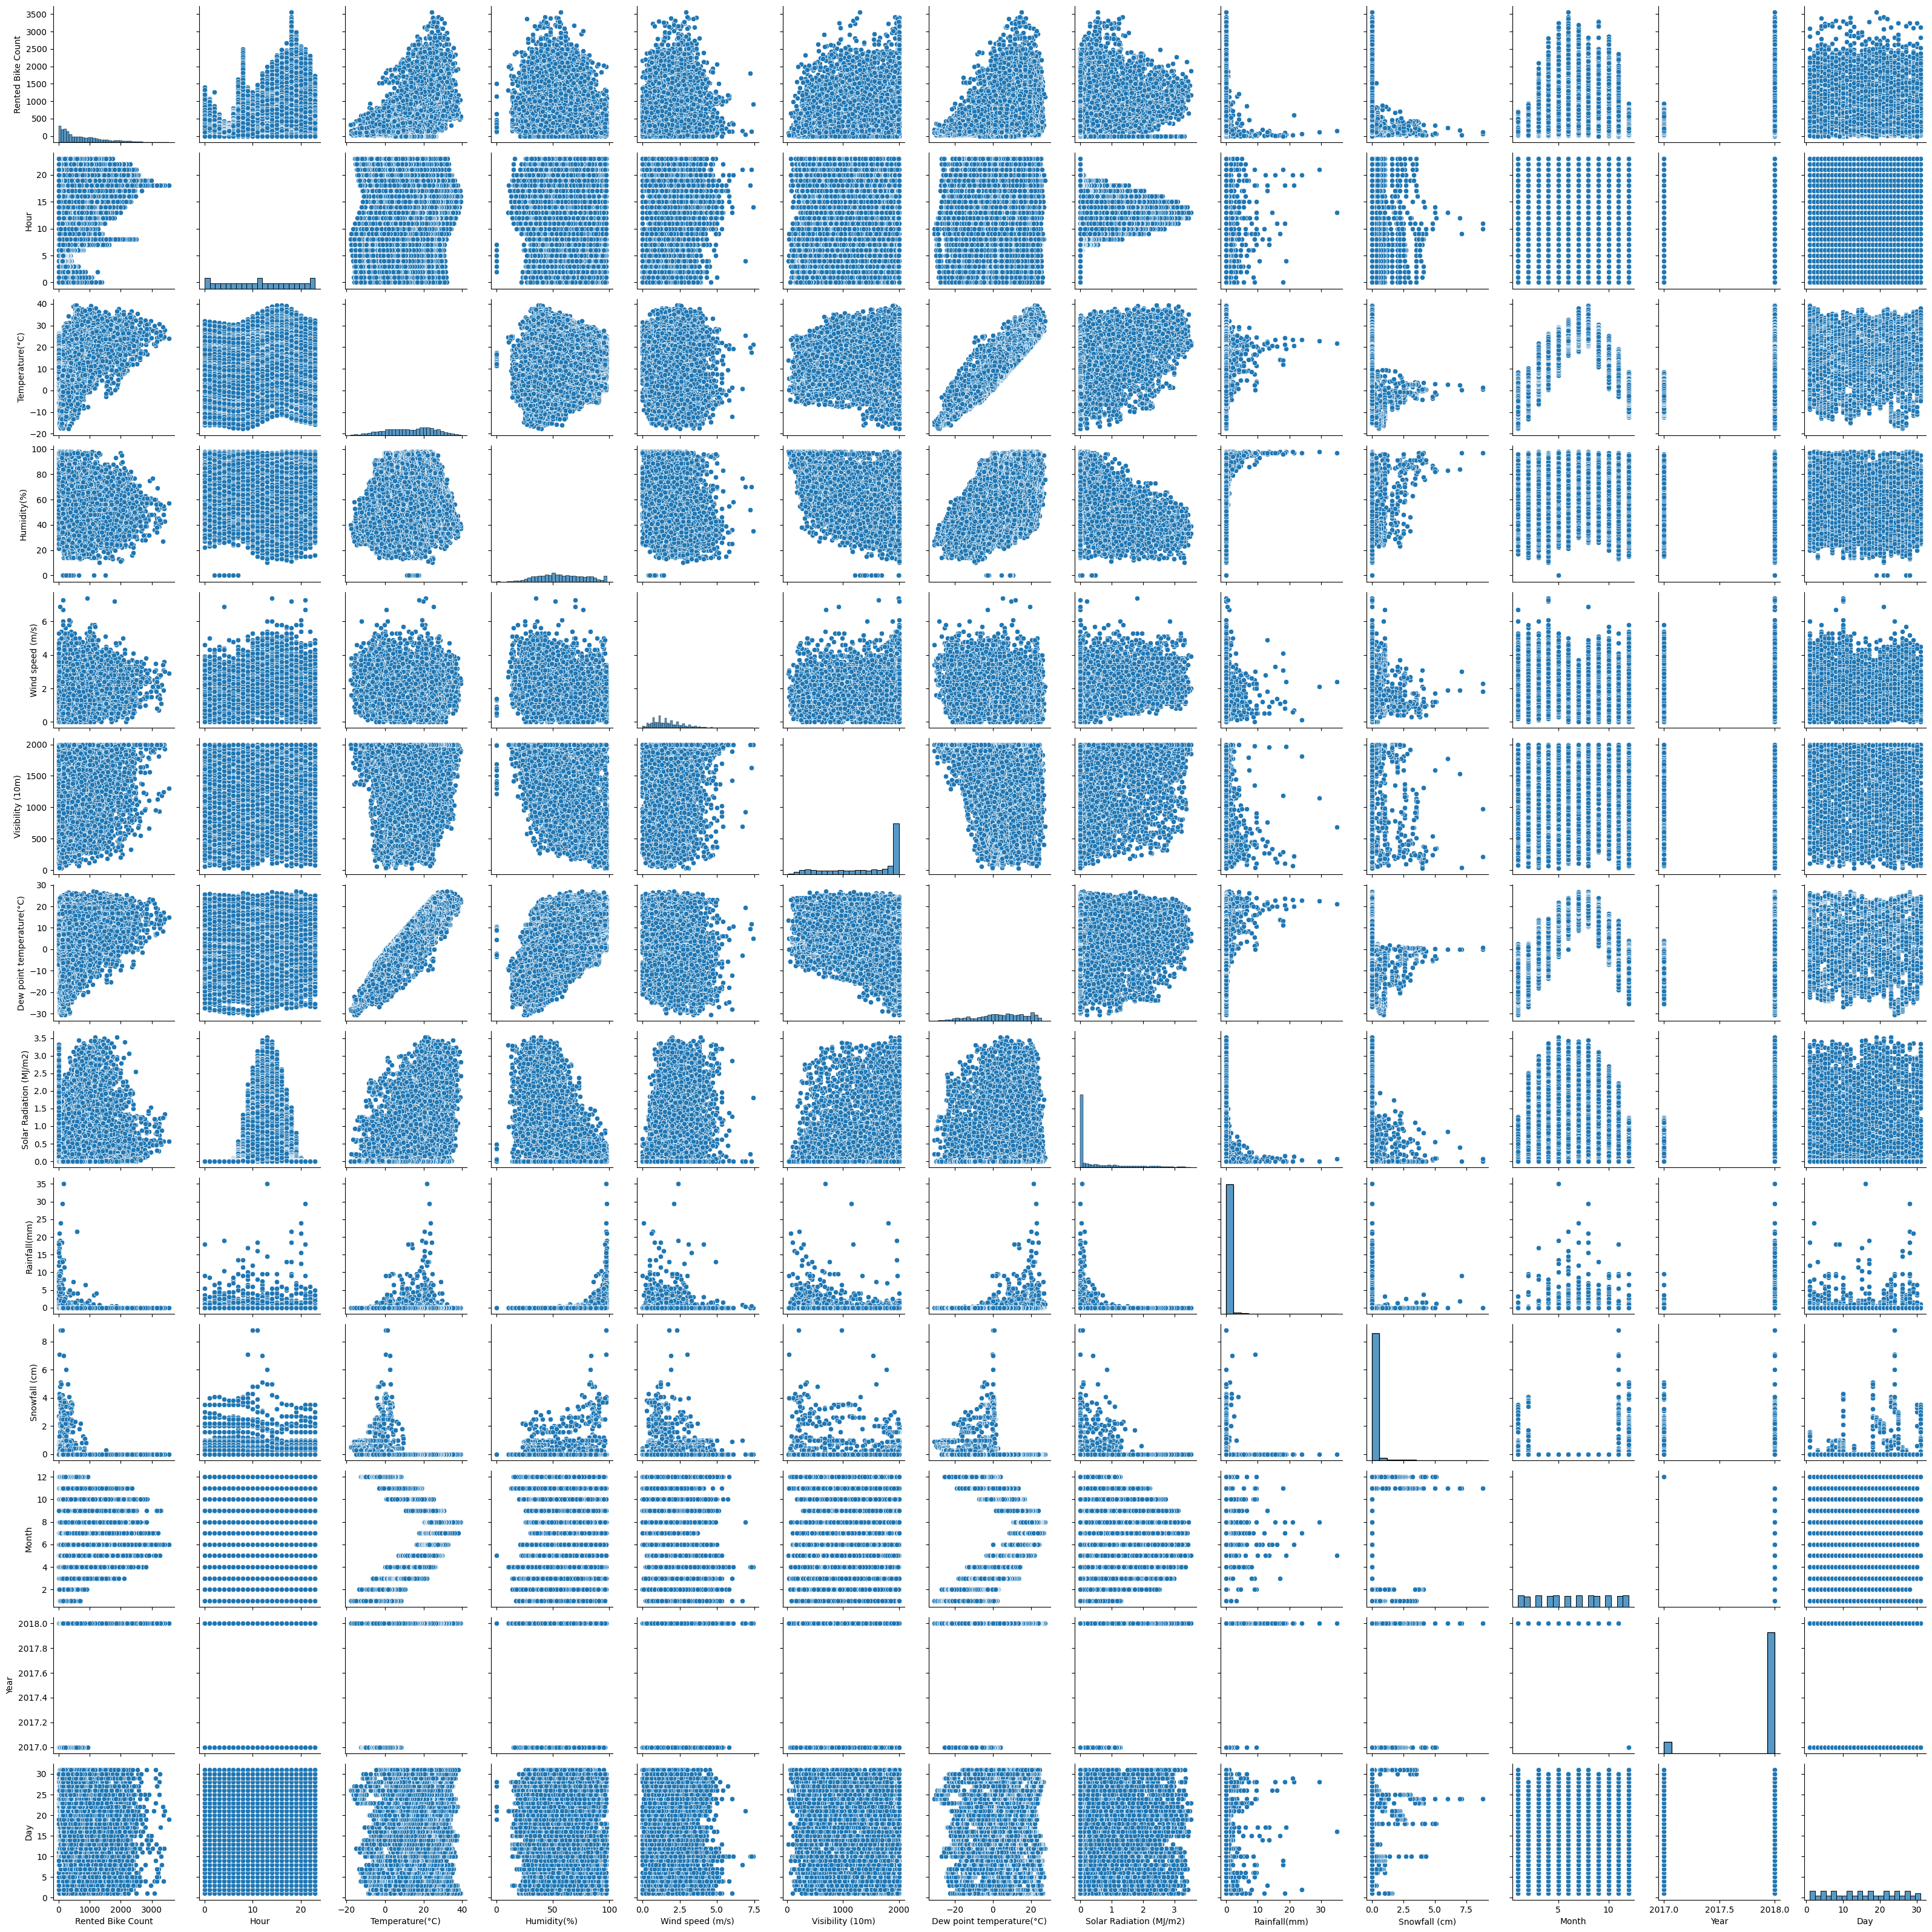

In [48]:
# Chart - 16 visualization code
sns.pairplot(bike_df)
plt.show()

##### 1. Why did you pick the specific chart?

Pairplots offer a quick overview of the relationships between all pairs of variables in a dataset. Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

##### 2. What is/are the insight(s) found from the chart?

* Dew point temperature is strongly correlated with temperature.

## **Basic Conclusions from Bivariate Analysis**

* Temperature and Hour have a strong correlation with the count of rented bikes.
* Dew point temperature is highly positively correlated to the Temperature.
* During the period from Dec 2017 to Nov 2018,bike rental facilities were available on most days.The service was unavailable only for 13 days.
* The demand for rental bikes is higher on Regular days(Non-Holidays) .
* There is more demand for rental bikes on Weekdays than on Weekends.
* The peak demands for rental bikes occur on the opening (8-9 AM) and closing times (6-7pm) of offices and institutions.
* There is a significant drop in the number of rented bikes during Winters(Dec-Feb) because it's freezing cold!
* The demand for bikes increases during warmer temperatures,which is why there's maximum count of rented bikes during the Summer season.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

The average number of rented bikes on weekends is significantly different from the average number of rented bikes on weekdays.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   Null Hypothesis (H0): There is no significant difference between the average number of rented bikes on weekends and weekdays. (H0: μ_weekend = μ_weekday)
*   Alternative Hypothesis (Ha): There is a significant difference between the average number of rented bikes on weekends and weekdays. (Ha: μ_weekend ≠ μ_weekday)

#### 2. Perform an appropriate statistical test.

In [49]:
import scipy.stats as stats

# Separate the data into weekends and weekdays
weekend_rentals = bike_df[bike_df['Weekend'] == 'Y']['Rented Bike Count']
weekday_rentals = bike_df[bike_df['Weekend'] == 'N']['Rented Bike Count']

# Perform an independent t-test to compare the means of the two groups
t_stat, p_value = stats.ttest_ind(weekend_rentals, weekday_rentals, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in bike rentals between weekends and weekdays.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in bike rentals between weekends and weekdays.")


T-statistic: -3.5408024648934004, P-value: 0.0004025729811488141
Reject the null hypothesis: There is a significant difference in bike rentals between weekends and weekdays.


##### Which statistical test have you done to obtain P-Value?

The statistical test used here is an independent t-test.

##### Why did you choose the specific statistical test?

The independent t-test was chosen because it is appropriate for comparing the means of two independent groups (weekends and weekdays) to determine if there is a statistically significant difference between them.

### Hypothetical Statement - 2

The average number of rented bikes in the summer season is higher than in the winter season.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   Null Hypothesis (H0): The average number of rented bikes in the summer is equal to or less than in the winter. (H0: μ_summer ≤ μ_winter)
*   Alternative Hypothesis (Ha): The average number of rented bikes in the summer is higher than in the winter. (Ha: μ_summer > μ_winter)

#### 2. Perform an appropriate statistical test.

In [50]:
summer_rentals = bike_df[bike_df['Seasons'] == 'Summer']['Rented Bike Count']
winter_rentals = bike_df[bike_df['Seasons'] == 'Winter']['Rented Bike Count']

# Perform a one-tailed t-test
t_stat, p_value = stats.ttest_ind(summer_rentals, winter_rentals, equal_var=False, alternative='greater')

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average number of rented bikes in the summer is higher than in the winter.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in bike rentals between summer and winter.")


T-statistic: 53.7534610575521, P-value: 0.0
Reject the null hypothesis: The average number of rented bikes in the summer is higher than in the winter.


##### Which statistical test have you done to obtain P-Value?

The statistical test used here is a one-tailed independent t-test.

##### Why did you choose the specific statistical test?

The one-tailed t-test was chosen because it is used to determine if the mean of one group (summer rentals) is significantly greater than the mean of another group (winter rentals).

### Hypothetical Statement - 3

There is a significant correlation between temperature and the number of rented bikes.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   Null Hypothesis (H0): There is no correlation between temperature and the number of rented bikes. (H0: ρ = 0)
*   Alternative Hypothesis (Ha): There is a significant correlation between temperature and the number of rented bikes. (Ha: ρ ≠ 0)

#### 2. Perform an appropriate statistical test.

In [51]:
# Calculate the Pearson correlation coefficient and the p-value
corr, p_value = stats.pearsonr(bike_df['Temperature(°C)'], bike_df['Rented Bike Count'])

print(f"Pearson correlation coefficient: {corr}, P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between temperature and bike rentals.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between temperature and bike rentals.")


Pearson correlation coefficient: 0.5385581530139791, P-value: 0.0
Reject the null hypothesis: There is a significant correlation between temperature and bike rentals.


##### Which statistical test have you done to obtain P-Value?

The statistical test used here is the Pearson correlation coefficient test.

##### Why did you choose the specific statistical test?

The Pearson correlation coefficient test was chosen because it measures the linear correlation between two continuous variables (temperature and rented bike count), indicating the strength and direction of the relationship.

## ***6. Feature Engineering & Data Pre-processing***

In [52]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_vif(dataframe):
    '''
    This function calculates the variance inflation factor of the independent features in the dataset
    '''
    # the independent variables set
    X = dataframe
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
    print(vif_data)

In [53]:
# Displaying the columns in the dataframe
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Days_of_week', 'Year', 'Day',
       'Weekend'],
      dtype='object')

In [54]:
# Checking the VIF value of certain columns in bike_df
check_vif(bike_df[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
        'Month','Year','Day']])

                      feature         VIF
0                        Hour    4.458880
1             Temperature(°C)  188.666573
2                 Humidity(%)  187.533688
3            Wind speed (m/s)    4.890096
4            Visibility (10m)   10.788995
5   Dew point temperature(°C)  126.954261
6     Solar Radiation (MJ/m2)    2.904971
7                Rainfall(mm)    1.103386
8               Snowfall (cm)    1.155412
9                       Month    5.108772
10                       Year  407.025112
11                        Day    4.379818


Multicolinearity causes reduction in the statistical power of your regression model

Let's check the values of VIF if we exclude Dew point temperature and Year.

In [55]:
check_vif(bike_df[['Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','Month','Day']])

                   feature       VIF
0                     Hour  3.997641
1          Temperature(°C)  3.288024
2              Humidity(%)  6.802299
3         Wind speed (m/s)  4.667341
4         Visibility (10m)  5.471035
5  Solar Radiation (MJ/m2)  2.275006
6             Rainfall(mm)  1.080689
7            Snowfall (cm)  1.139759
8                    Month  5.027060
9                      Day  3.776455


The VIF of the features,now lie within the acceptable range.

In [56]:
# Dropping 'Dew point temperature(°C)','Year' to reduce the VIF
bike_df.drop(columns=['Dew point temperature(°C)','Year'],inplace=True)

In [57]:
#Creating a copy of the main dataframe 'bike_df'
df =bike_df.copy()

In [58]:
#Creating dummies for the Categorical columns
df = pd.get_dummies(bike_df, columns = ['Seasons','Holiday','Weekend','Functioning Day'],drop_first=True)
df.head(2)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   

   Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0               2.2              2000                      0.0           0.0   
1               0.8              2000                      0.0           0.0   

   Snowfall (cm)  Month Days_of_week  Day  Seasons_Spring  Seasons_Summer  \
0            0.0     12       Friday    1           False           False   
1            0.0     12       Friday    1           False           False   

   Seasons_Winter  Holiday_No Holiday  Weekend_Y  Functioning Day_Yes  
0            True                True      False                 True  
1            True                True      False                 True

In [59]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Days_of_week', 'Day',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Weekend_Y', 'Functioning Day_Yes'],
      dtype='object')

In [60]:
#Dropping the columns Date and Days_of_week
df.drop(['Days_of_week','Date'],axis=1,inplace=True)

In [61]:
#Displaying the columns present in the dataframe 'df'
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Day', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday', 'Weekend_Y',
       'Functioning Day_Yes'],
      dtype='object')

## ***7. ML Model Implementation***

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [63]:
# Defining independent and dependent variables

y = df['Rented Bike Count']
X = df.drop('Rented Bike Count',axis=1)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
print(f'The shape of X : {X.shape}\n The shape of X_train : {X_train.shape}\n The shape of X_test : {X_test.shape}')

The shape of X : (8760, 16)
 The shape of X_train : (6132, 16)
 The shape of X_test : (2628, 16)


In [66]:
# Creating functions to calculate the Evaluation metrics for the regression models

def evaluate_model(name,X_test,y_true,y_pred):

  '''
  This function calculate  metrics for evaluating
  the perfomance of Regression models
  '''
  list_=[]
  #calculating mean absolute error
  MAE =  mean_absolute_error(y_true,y_pred)
  print(f'MAE : {MAE}')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_true,y_pred)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_true,y_pred)
  print("R2 :" ,r2)

  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_true,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  list_.extend([name,MAE,MSE,RMSE,r2,adj_r2])
  return(list_)


In [67]:
# Creating a  list which would store lists of different models and their performance metrics
list_of_models=[]


### ML Model - 1 : Linear Regression

* **Multiple Linear Regression**

In [68]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [69]:
# Importing the Linear Regression model
from sklearn.linear_model import LinearRegression

In [70]:
# Fitting the data to Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [71]:
# Predicting the values of y from X_test
y_pred= regressor.predict(X_test)

In [72]:
# Evaluating the model
list_of_models.append(evaluate_model('Multiple Linear Regression',X_test,y_test,y_pred))

MAE : 327.6657898743315
MSE : 188770.6925362117
RMSE : 434.4774937050384
R2 : 0.5393478523845607
Adjusted R2 :  0.5365250127208889


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Multiple Linear Regression (MLR) model used in this context predicts the outcome based on multiple explanatory variables. The performance metrics show a Mean Absolute Error (MAE) of 327.67, Mean Squared Error (MSE) of 188770.69, and Root Mean Squared Error (RMSE) of 434.48, indicating some large prediction errors. The R-squared value is 0.5393, meaning the model explains approximately 53.93% of the variance in the dependent variable. The adjusted R-squared is slightly lower at 0.5365, suggesting that additional predictors did not substantially improve the model's explanatory power.

#### 2. Cross- Validation & Hyperparameter Tuning

Neither cross-validation nor hyperparameter tuning has been implemented.


### ML Model - 2 : Lasso Regression

* **Lasso Regression with Hyper-parameter Tuning**

In [73]:
# Importing the classes required for Cross Validation
from sklearn.model_selection import RandomizedSearchCV as rscv
from sklearn.model_selection import GridSearchCV as gsv

In [74]:
# Importing the linear_model class from sklearn library
from sklearn import linear_model

# Creating a Lasso Linear model object
ls_model = linear_model.Lasso()

In [75]:
# Creating the parameter grid which has the range of hyperparameters to be tuned
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.005,)
grid['max_iter'] = [25,50,100,500,1000]

In [76]:
# Performing GridSearch CV to find the best combination of hyperparameters
ls_model=gsv(estimator=ls_model, param_grid=grid,cv=5 ,verbose=1, scoring='r2')

In [77]:
# Training the model on the training data
ls_model.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 ,...
       0.72 , 0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 ,
       0.765, 0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805,
       0.81 , 0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 ,
       0.855, 0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895,
       0.9  , 0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 ,
       0.945, 0.95 , 0.955, 0.96 , 0.965, 0.97 , 0.975, 0.98 , 0.985,
       0.99 , 0.995]),
                         'max_iter': [25, 50, 100, 500, 1000]},
             scoring='r2', verbose=1)

In [78]:
# Displaying the best estimators(hyperparameter combination) and score
print(ls_model.best_estimator_,'The best score is ',ls_model.best_score_)

Lasso(alpha=0.23500000000000001, max_iter=25) The best score is  0.5559063428609835


In [79]:
# Train the Lasso model using the best found hyper parameters on the entire training dataset
best_lasso = ls_model.best_estimator_
best_lasso.fit(X_train, y_train)

Lasso(alpha=0.23500000000000001, max_iter=25)

In [80]:
# Using the optimal Lasso model to predict the values for y from X_test
y_pred=best_lasso.predict(X_test)

In [81]:
# Evaluating the model
list_of_models.append(evaluate_model('Lasso Regression(Tuned)',X_test,y_test,y_pred))

MAE : 327.5787900127513
MSE : 188737.802790525
RMSE : 434.4396422870788
R2 : 0.5394281123644419
Adjusted R2 :  0.5366057645275331


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In this case, the Lasso Regression model was used, which is a type of linear regression that includes L1 regularization to penalize the absolute size of the coefficients, potentially setting some of them to zero. This can help in feature selection and prevent overfitting. The performance metrics for the tuned Lasso Regression model show a Mean Absolute Error (MAE) of 327.58, Mean Squared Error (MSE) of 188737.80, and Root Mean Squared Error (RMSE) of 434.44. The R-squared value is 0.5394, indicating that about 53.94% of the variance in the dependent variable is explained by the model. The adjusted R-squared value is 0.5366, showing that the model's predictive capability is slightly improved after hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

Both cross-validation and hyperparameter tuning were employed. Cross-validation was performed using GridSearchCV with 5 folds (cv=5), which splits the training data into five subsets, using four for training and one for validation in each iteration, ensuring robust evaluation of model performance. Hyperparameter tuning involved searching through a grid of parameters ('alpha' and 'max_iter') to find the best combination. This process optimizes the Lasso model by finding the parameters that yield the highest R-squared score, resulting in improved model performance as evidenced by the evaluation metrics.









### ML Model - 3 : Ridge Regression

* **Ridge Regression with default parameters**

In [82]:
# Importing Ridge from linear_model class of sklearn library
from sklearn.linear_model import Ridge

In [83]:
# Creating an instance of Ridge regression
ridge=Ridge()

In [86]:
# Training the model
ridge.fit(X_train,y_train)

Ridge()

In [87]:
# Predicting the values of y from the test data
y_pred=ridge.predict(X_test)

In [88]:
ridge.score(X_train,y_train)

0.558631773704932

In [89]:
# Evaluating the model
list_of_models.append(evaluate_model('Ridge Regression (default)',X_test,y_test,y_pred))

MAE : 327.65717168634285
MSE : 188767.25013472006
RMSE : 434.473532145193
R2 : 0.5393562527862268
Adjusted R2 :  0.5365334645995472


* **Ridge Regression with Hyper-Parameter Tuning**

In [90]:
# Creating an object of linear model with Ridge regularization
Ridge_model = linear_model.Ridge()

In [91]:
# Creating the parameter grid with the range of hyperparameters to be tuned
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.005)
grid['max_iter'] = [25,50,100,500,1000]

In [92]:
# Perfoming cross-validation to find the best model
Ridge_model=gsv(estimator=Ridge_model, param_grid=grid,cv=5 ,verbose=1, scoring='r2')
Ridge_model.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 ,...
       0.72 , 0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 ,
       0.765, 0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805,
       0.81 , 0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 ,
       0.855, 0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895,
       0.9  , 0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 ,
       0.945, 0.95 , 0.955, 0.96 , 0.965, 0.97 , 0.975, 0.98 , 0.985,
       0.99 , 0.995]),
                         'max_iter': [25, 50, 100, 500, 1000]},
             scoring='r2', verbose=1)

In [93]:
print(Ridge_model.best_estimator_,Ridge_model.best_score_)

Ridge(alpha=0.995, max_iter=25) 0.5558996785868935


In [94]:
# Refit the model using the best hyperparameters found during GridSearchCV
best_ridge = Ridge_model.best_estimator_
best_ridge.fit(X_train,y_train)

Ridge(alpha=0.995, max_iter=25)

In [ ]:
y_pred = best_ridge.predict(X_test)

In [ ]:
# Evaluating the model
list_of_models.append(evaluate_model('Ridge Regression(Tuned)',X_test,y_test,y_pred))

MAE : 327.6572143132237
MSE : 188767.2672383388
RMSE : 434.4735518283464
R2 : 0.5393562110487166
Adjusted R2 :  0.5365334226062728


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The Ridge Regression model used in the code incorporates L2 regularization to penalize the magnitude of coefficients, helping to prevent overfitting. The performance of the default Ridge Regression model is evaluated with the following metrics: MAE (327.66), MSE (188767.25), RMSE (434.47), R² (0.5394), and Adjusted R² (0.5365). These metrics indicate that the model explains approximately 53.94% of the variance in the target variable, with an average error magnitude of around 434.47 units. The tuned Ridge Regression model, obtained through GridSearchCV with cross-validation, yielded very similar results, demonstrating that hyperparameter tuning did not significantly enhance the model's performance.

#### 2. Cross- Validation & Hyperparameter Tuning

Cross-validation and hyperparameter tuning are key techniques used to enhance model robustness and performance. Cross-validation, specifically 5-fold cross-validation in this code, divides the training data into five subsets. The model is trained on four subsets and validated on the fifth, repeating this process to ensure that every subset is used for validation. This helps in assessing the model's performance more reliably and reduces the likelihood of overfitting. Hyperparameter tuning, implemented via GridSearchCV, involves searching over a predefined grid of parameters (alpha and max_iter for Ridge Regression) to find the combination that maximizes model performance. GridSearchCV performs an exhaustive search with cross-validation to select the optimal parameters. Despite this thorough tuning process, the tuned model's performance metrics were almost identical to the default model's, indicating that the initial settings were already close to optimal.


### ML Model - 4 : ElasticNet Regression

* **ElasticNet with default parameters**

In [ ]:
# Importing Elastic Net
from sklearn.linear_model import ElasticNet

In [ ]:
# Creating an instance of ElasticNet model
elasticnet = ElasticNet()

In [ ]:
# Fitting the model to train data and finding its score
elasticnet.fit(X_train,y_train)
elasticnet.score(X_train, y_train)

0.5044829035117837

In [ ]:
# Predicting the values of y from test data
y_pred = elasticnet.predict(X_test)

In [ ]:
# Evaluating the model
list_of_models.append(evaluate_model('Elastic Net Regression(default)',X_test,y_test,y_pred))

MAE : 332.6891140383305
MSE : 206068.92602930366
RMSE : 453.9481534595153
R2 : 0.49713542893319496
Adjusted R2 :  0.49405391490137995


* **Elastic Net regression with Hyperparameter tuning**

In [ ]:
# Creating an instance of ElasticNet model
elastic = ElasticNet()

# Creating the parameter grid
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}


In [ ]:
# Performing GridSearch Cross Validation to find the best parameters

elastic_regressor = gsv(elastic, parameters,scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.8}

Using  {'alpha': 0.01, 'l1_ratio': 0.8}  the negative mean squared error is:  -185643.02046729444


In [ ]:
# Refit the model using the best hyperparameters found during GridSearchCV
best_elasticnet=elastic_regressor.best_estimator_
best_elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.01, l1_ratio=0.8)

In [ ]:
# Predicting the values of y from best model
y_pred_elastic = best_elasticnet.predict(X_test)

In [ ]:
# Evaluating the model
list_of_models.append(evaluate_model('Elastic Net Regression(Tuned)',X_test,y_test,y_pred_elastic))

MAE : 327.5596252492518
MSE : 188730.34572316232
RMSE : 434.4310598048467
R2 : 0.5394463096494619
Adjusted R2 :  0.536624073324066


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Elastic Net Regression, a hybrid of Ridge and Lasso regressions is used to model the relationship between features and a target variable. The model employs both L1 and L2 regularization to address multicollinearity and perform variable selection. Initially, the default Elastic Net model is trained and evaluated on the dataset, yielding an R² of approximately 0.4971. This indicates that around 49.71% of the variance in the target variable is explained by the model. The performance metrics, including MAE, MSE, RMSE, R², and Adjusted R², provide insights into the model's predictive accuracy and goodness of fit. Following hyperparameter tuning, the model's performance improves, achieving an R² of about 0.5394. This signifies enhanced explanatory power and suggests that the tuned Elastic Net model offers better predictive capabilities compared to the default model.

#### 2. Cross- Validation & Hyperparameter Tuning

Cross-validation is employed to evaluate model performance robustly by partitioning the dataset into multiple subsets, training the model on a subset, and evaluating it on the remaining data. In this code, 5-fold cross-validation is utilized to ensure that the model's performance is consistent across different subsets of the data. Hyperparameter tuning is performed using GridSearchCV, an exhaustive search technique that iterates over a predefined grid of hyperparameters to find the optimal combination. The grid includes parameters such as alpha (regularization strength) and l1_ratio (mixing parameter for L1 and L2 penalties). GridSearchCV evaluates the model's performance using cross-validation and selects the best hyperparameters based on a specified scoring metric, which is negative mean squared error in this case. This process enhances the model's performance by optimizing its configuration for improved predictive accuracy.


### ML Model - 5 : Polynomial Regression

In [ ]:
#importing the packages required for preprocessing,creating pipeline,cross-validation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
def PolynomialRegression(degree=1, **kwargs):#initializing the degree as 1,however the degree will change while performing GridSearch cross-validation
  '''
  This function creates a pipeline that first transforms the input features into polynomial features of the specified degree
  and then applies linear regression to the transformed features.
  '''
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [ ]:
# Creating a parameter grid which defines the range of degrees for polynomial features to be tested during grid search cross-validation.
parameters = {'polynomialfeatures__degree': [2,3,4,5]}

# Creating a PolynomialRegression object
poly_regressor = PolynomialRegression()

# Perfoming GridSearch Cross-validation to find the optimal parameters
poly_grid = GridSearchCV(poly_regressor, param_grid=parameters,cv=3, scoring='neg_mean_squared_error', verbose=3)
poly_grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END polynomialfeatures__degree=2;, score=-120468.554 total time=   0.1s
[CV 2/3] END polynomialfeatures__degree=2;, score=-116717.613 total time=   0.2s
[CV 3/3] END polynomialfeatures__degree=2;, score=-115333.616 total time=   0.2s
[CV 1/3] END polynomialfeatures__degree=3;, score=-19292281230514962038784.000 total time=   1.6s
[CV 2/3] END polynomialfeatures__degree=3;, score=-180221944643325624320.000 total time=   1.5s
[CV 3/3] END polynomialfeatures__degree=3;, score=-161973589391367110393856.000 total time=   1.1s
[CV 1/3] END polynomialfeatures__degree=4;, score=-5881184334363956258799616.000 total time=  49.8s
[CV 2/3] END polynomialfeatures__degree=4;, score=-496139216684047818293248.000 total time=  51.5s
[CV 3/3] END polynomialfeatures__degree=4;, score=-123071564532424891212759040.000 total time=  51.3s
[CV 1/3] END polynomialfeatures__degree=5;, score=-108033939944.750 total time= 1.6min
[CV 2/3] END pol

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=1)),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4, 5]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print("\n The best parameters across ALL searched params:\n",poly_grid.best_params_)


 The best parameters across ALL searched params:
 {'polynomialfeatures__degree': 2}


In [ ]:
# Training data is transformed into polynomial features of degree 2
poly_features = PolynomialFeatures(degree =2)
X_train_poly = poly_features.fit_transform(X_train)

# A linear regression model is trained using the transformed polynomial features.
poly_regressor = LinearRegression( )
poly_regressor.fit(X_train_poly, y_train)

# Test data is transformed using the same polynomial features transformation
# Predicting the y values from X_test
X_test_transform=poly_features.transform(X_test)
y_pred=poly_regressor.predict(X_test_transform)

In [ ]:
# Determining the evaluation metrics of the model
print(f'The polynomial with degree = 2 is optimal fit')
list_of_models.append(evaluate_model('Polynomial Regression(Tuned)',X_test,y_test,y_pred))

The polynomial with degree = 2 is optimal fit
MAE : 251.54699391171994
MSE : 144758.55926560122
RMSE : 380.4714959962194
R2 : 0.6467495016546372
Adjusted R2 :  0.6445848107417587


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Polynomial Regression is used to model the relationship between independent features and a target variable. Polynomial Regression extends linear regression by transforming the features into polynomial terms of a specified degree. In this case, the degree of the polynomial is optimized using GridSearchCV, which performs an exhaustive search over a range of degrees to find the optimal degree for the polynomial features. After determining the optimal degree (in this case, degree 2), the independent features are transformed into polynomial features, and linear regression is performed using the transformed features to predict the target variable. The evaluation metrics for the model, including MAE, MSE, RMSE, R², and Adjusted R², are then computed. The results show that the Polynomial Regression model with degree 2 provides a good fit to the data, with an R² of approximately 0.6467, indicating that around 64.67% of the variance in the target variable is explained by the model.

#### 2. Cross- Validation & Hyperparameter Tuning

Cross-validation is utilized to assess the model's performance robustly by splitting the dataset into multiple subsets and evaluating the model on each subset. In this code, 3-fold cross-validation is employed (cv=3), dividing the data into three subsets for training and testing the model. Hyperparameter tuning is performed using GridSearchCV, which iterates over a specified parameter grid to find the optimal hyperparameters. In this case, the parameter grid includes the degree of the polynomial features (polynomialfeatures__degree), with values ranging from 2 to 5. GridSearchCV evaluates the model's performance using the specified scoring metric (negative mean squared error) and selects the best degree for the polynomial features based on the performance across all folds of cross-validation. This process ensures that the model is optimized for predictive accuracy and generalization to unseen data.


### ML Model - 6 : Decision Tree Regressor

In [ ]:
# Splitting the data to train and test again(to obtain non-scaled test and train data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# This function plots the importance of each feature used by the decision tree model.
# It sorts the features by their importance and creates a horizontal bar plot.
def plotting_imp_features(model, training_data):
  imp_features = model.feature_importances_
  feature_names = training_data.columns
  _imp_features = pd.Series(imp_features, index=feature_names)
  return _imp_features.sort_values(ascending=True).plot(kind='barh',figsize=[10,8], title='Feature Importance')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

#Creating a decision tree regressor object
dtr = DecisionTreeRegressor()

# hyper-parameter tuning using gridSearchCV
parameters = {'max_depth': [int(i) for i in np.linspace(start=3, stop=20, num=17)],
              'min_samples_split':[2,3,4],
              'min_samples_leaf':[1,2,3,4],
              }

gridsearch_dtr = GridSearchCV(dtr, parameters, scoring='r2', cv=5)
# The model is trained and cross-validated over the grid of parameters.
gridsearch_dtr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 20],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4]},
             scoring='r2')

In [ ]:
# The best combination of hyper-parameters found by GridSearchCV is printed.
print('Best parameters for our model are: max_depth={}, min_samples_split={}, min_samples_leaf={}'.format(gridsearch_dtr.best_params_['max_depth'],
                                    gridsearch_dtr.best_params_['min_samples_split'], gridsearch_dtr.best_params_['min_samples_leaf']))

Best parameters for our model are: max_depth=14, min_samples_split=4, min_samples_leaf=4


In [ ]:
# The R² score of the best model on the training and testing data is printed.
train_score = gridsearch_dtr.best_score_
test_score = gridsearch_dtr.best_estimator_.score(X_test,y_test)

print('The best r2 score for train data is {}'.format(train_score))
print('The best r2 score for test data is {}'.format(test_score))

The best r2 score for train data is 0.8721484440504348
The best r2 score for test data is 0.8696470457590324


In [ ]:
# The decision tree model is retrained using the best combination of hyper-parameters.
best_dtr = gridsearch_dtr.best_estimator_

In [ ]:
best_dtr.fit(X_train,y_train)
# The trained model is used to make predictions on the test data.
y_pred=best_dtr.predict(X_test)

In [ ]:
# Evaluating the model
list_of_models.append(evaluate_model('Decision Tree Regression (Tuned)',X_test,y_test,y_pred))

MAE : 131.89944661274254
MSE : 53218.95398412744
RMSE : 230.69233620588145
R2 : 0.8701311887069929
Adjusted R2 :  0.8693353629771239


<Axes: title={'center': 'Feature Importance'}>

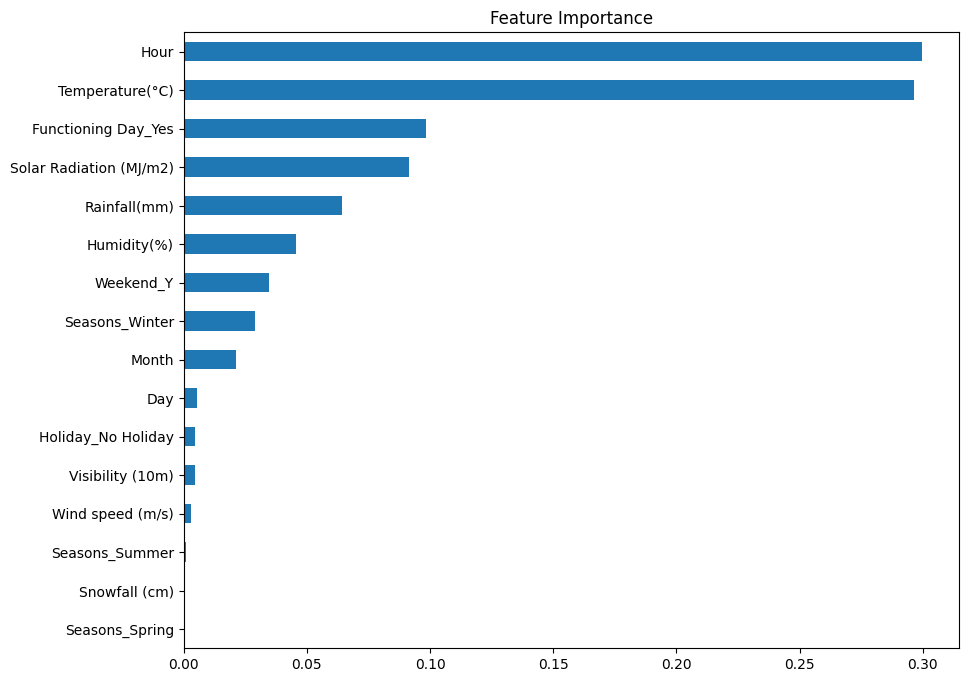

In [ ]:
# Visualizing features importance of Decision Tree Regressor model
plotting_imp_features(gridsearch_dtr.best_estimator_, X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The code implements Decision Tree Regression, a non-parametric supervised learning algorithm used for regression tasks. It constructs a binary tree structure where each internal node represents a feature and each leaf node represents a prediction. The algorithm recursively splits the data into subsets based on the values of features, aiming to minimize the variance of the target variable within each subset.

After hyperparameter tuning using GridSearchCV, the best Decision Tree Regressor model is fitted to the training data. The model's performance is evaluated using various metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R², and Adjusted R². These metrics provide insights into the accuracy and goodness of fit of the model. For the tuned model, the metrics indicate promising performance, with an R² of approximately 0.8702, suggesting that around 87.02% of the variance in the target variable is explained by the model.

#### 2. Cross- Validation & Hyperparameter Tuning

Cross-validation is a technique used to assess the performance of a machine learning model by splitting the dataset into multiple subsets (folds), training the model on some folds, and evaluating it on the remaining folds. In this code, 5-fold cross-validation is employed during hyperparameter tuning to ensure robustness and reliability in model evaluation.

Hyperparameter tuning is performed using GridSearchCV, which systematically searches through a grid of hyperparameters to find the optimal combination that maximizes the performance of the model. In this case, the hyperparameters of the Decision Tree Regressor model, including max_depth, min_samples_split, and min_samples_leaf, are tuned over a specified range of values. GridSearchCV evaluates the model's performance using cross-validation and selects the best hyperparameters based on a specified scoring metric (R² in this case). This process helps optimize the model's configuration for improved predictive accuracy and generalization to unseen data.


### ML Model - 7 : Random Forest Regressor

In [ ]:
#importing the Random Forest regressor from ensemble module and GirdSearchCV for tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# rfr model
rfr = RandomForestRegressor()

# A dictionary parameters is defined to specify the range of values for the hyperparameters that we want to tune.
parameters = {'max_depth': [50, 60, 70],
              'min_samples_split':[2,3,4],
              'min_samples_leaf':[1,2,3,4],
              'n_estimators':[100, 150, 200]
              }

result = GridSearchCV(rfr, parameters, scoring='r2', cv=5)
result.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [ ]:
# The best hyperparameters found by GridSearchCV are printed.
print('Best parameters for our model are: max_depth={}, min_samples_split={}, min_samples_leaf={}, n_estimators={}'.format(result.best_params_['max_depth'],
                                    result.best_params_['min_samples_split'], result.best_params_['min_samples_leaf'], result.best_params_['n_estimators']))
# result.best_params_

Best parameters for our model are: max_depth=70, min_samples_split=2, min_samples_leaf=1, n_estimators=150


In [ ]:
# The best R² score for the training data is stored in train_score.
train_score = result.best_score_
# The R² score for the test data is computed using the best estimator from GridSearchCV and stored in test_score.
test_score = result.best_estimator_.score(X_test,y_test)

print('The best r2 score for train data is {}'.format(train_score))
print('The best r2 score for test data is {}'.format(test_score))

The best r2 score for train data is 0.924570751118608
The best r2 score for test data is 0.9212195745997385


In [ ]:
best_rfr = RandomForestRegressor(max_depth=60, min_samples_split=2, min_samples_leaf=1, n_estimators=200)

In [ ]:
# A RandomForestRegressor with the best hyperparameters is created and fitted on the training data.
best_rfr.fit(X_train,y_train)
y_pred=best_rfr.predict(X_test)

In [ ]:
# Evaluating the model
print(f'Training score:{best_rfr.score(X_train,y_train)}')
list_of_models.append(evaluate_model('Random Forest Regression(Tuned)',X_test,y_test,y_pred))

Training score:0.9903183693826516
MAE : 102.48903538812786
MSE : 31687.86957556126
RMSE : 178.01086926241683
R2 : 0.922672926728072
Adjusted R2 :  0.9221990725831655


<Axes: title={'center': 'Feature Importance'}>

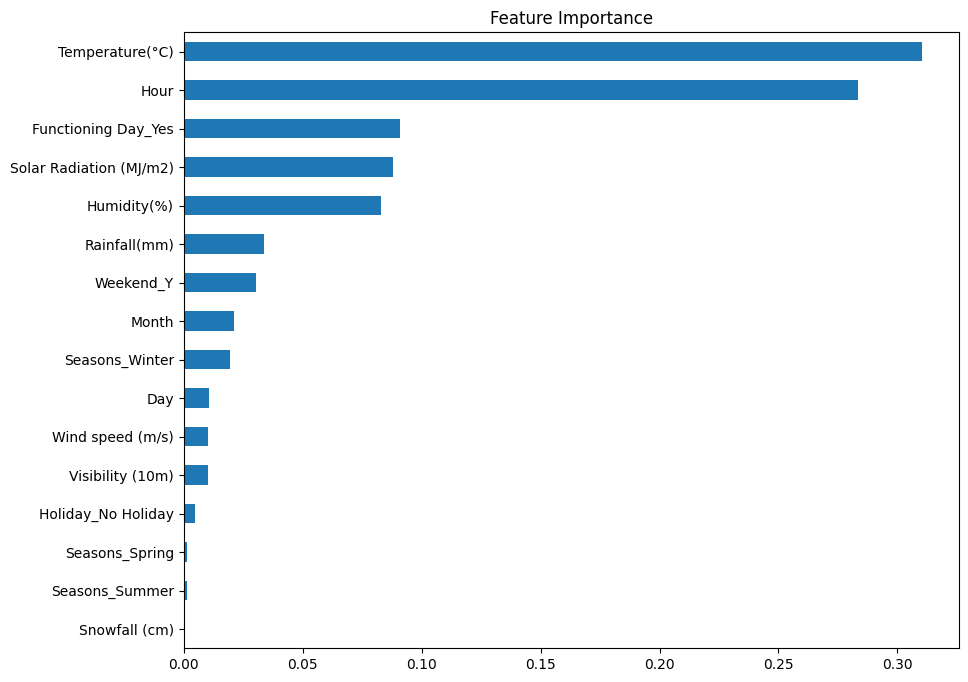

In [ ]:
# Visualizing features importance of Random Forest Regressor model
plotting_imp_features(result.best_estimator_, X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The code utilizes Random Forest Regression, an ensemble learning method that constructs multiple decision trees during training and combines their predictions to improve predictive accuracy and generalization. Hyperparameter tuning using GridSearchCV is employed to find the optimal values for hyperparameters such as max_depth, min_samples_split, min_samples_leaf, and n_estimators (number of trees in the forest). After tuning, the best Random Forest Regressor model is fitted to the training data and evaluated on the test data. The performance metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R², and Adjusted R², are computed. The results indicate that the tuned Random Forest Regressor model achieves promising performance, with an R² of approximately 0.9219 on the test data, suggesting that around 92.19% of the variance in the target variable is explained by the model.

#### 2. Cross- Validation & Hyperparameter Tuning

Cross-validation is a technique used to assess the performance of a machine learning model by splitting the dataset into multiple subsets (folds), training the model on some folds, and evaluating it on the remaining folds. In this code, 5-fold cross-validation is employed during hyperparameter tuning to ensure robustness and reliability in model evaluation.

Hyperparameter tuning is performed using GridSearchCV, an exhaustive search technique that iterates over a specified parameter grid to find the optimal combination of hyperparameters that maximizes the performance of the model. The parameter grid includes hyperparameters such as max_depth, min_samples_split, min_samples_leaf, and n_estimators, with various candidate values. GridSearchCV evaluates the model's performance using cross-validation and selects the best hyperparameters based on a specified scoring metric (R² in this case). This process helps optimize the model's configuration for improved predictive accuracy and generalization to unseen data.


### ML Model - 8 : XGBoost Regressor

In [ ]:
#importing the required packages and classes
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from xgboost import XGBRegressor
import xgboost as xgb

In [ ]:
# Calculates the Root Mean Squared Error (RMSE) using cross-validation.
def rmse_cv(model):
  rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
  return rmse

# Evaluates the model's predictions using MAE, MSE, RMSE, and R² metrics.
def evaluation(y, predictions):
  mae = mean_absolute_error(y, predictions)
  mse = mean_squared_error(y, predictions)
  rmse = np.sqrt(mean_squared_error(y, predictions))
  r_squared = r2_score(y, predictions)
  return mae, mse, rmse, r_squared

* **XGBoost with default parameters**

In [ ]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

list_of_models.append(evaluate_model('XGBoost Regression(default)',X_test,y_test,predictions))

MAE: 101.23132356564703
MSE: 29575.638126167447
RMSE: 171.97569050934916
R2 Score: 0.9278273494848646
------------------------------
RMSE Cross-Validation: 316.6963177520141
MAE : 101.23132356564703
MSE : 29575.638126167447
RMSE : 171.97569050934916
R2 : 0.9278273494848646
Adjusted R2 :  0.927385081231995


- **Xgboost with Hyperparameter Tuning**

In [ ]:
xgb_2 = XGBRegressor()
# A dictionary parameters is defined to specify the range of values for various hyperparameters.
parameters = {#'nthread':[4], #when use hyperthread, xgboost may become slower # supressing this HP,as this makes thing slower
              'objective':['reg:squarederror'],
              'learning_rate': [0.01,.03, 0.05, 0.07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [250,500,750,1000]}

xgb_grid = GridSearchCV(xgb_2,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

# The best hyperparameters found by GridSearchCV are printed.
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)


Fitting 2 folds for each of 48 candidates, totalling 96 fits
0.9391837572680523
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 1000, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}


In [ ]:
# A new XGBoost model is instantiated with these best parameters and trained on X_train.
best_xgb = XGBRegressor(n_estimators=1000, learning_rate=0.03,subsample=0.7,objective='reg:squarederror',max_depth = 7,silent=1,min_child_weight= 4,colsample_bytree= 0.7)
best_xgb.fit(X_train, y_train)
predictions = best_xgb.predict(X_test)
print(f'Training score:{best_xgb.score(X_train,y_train)}')
# Evaluating the model
list_of_models.append(evaluate_model('XGBoost Regression(Tuned)',X_test,y_test,predictions))


Training score:0.9951723484282436
MAE : 87.61567348119331
MSE : 22403.936931758893
RMSE : 149.6794472589971
R2 : 0.9453282629628758
Adjusted R2 :  0.9449932389136249


<Axes: title={'center': 'Feature Importance'}>

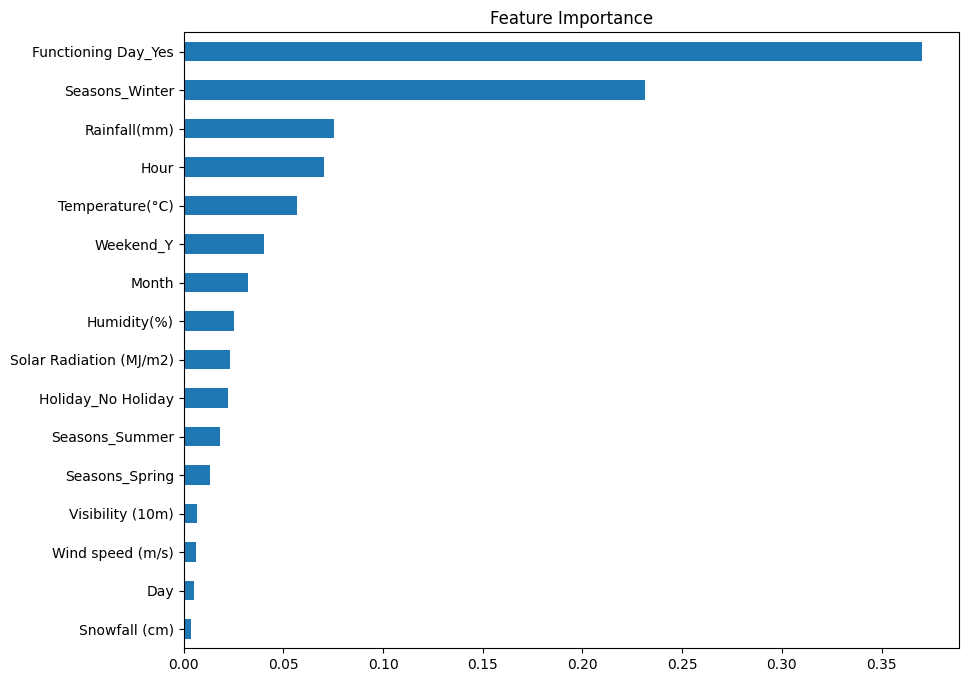

In [ ]:
# Visualizing features importance of XGBoost model
plotting_imp_features(best_xgb, X_train)

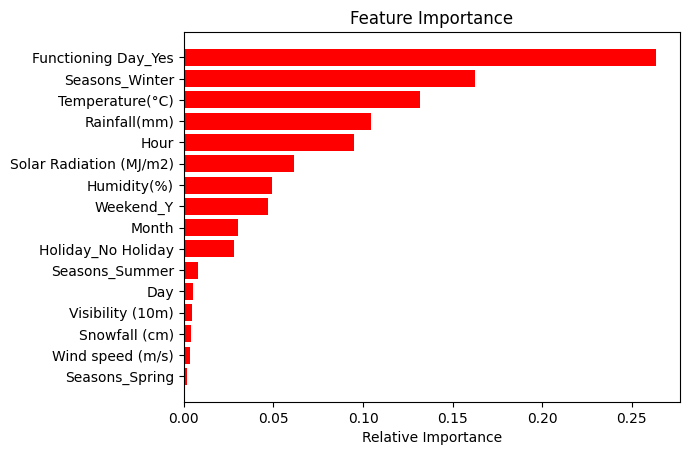

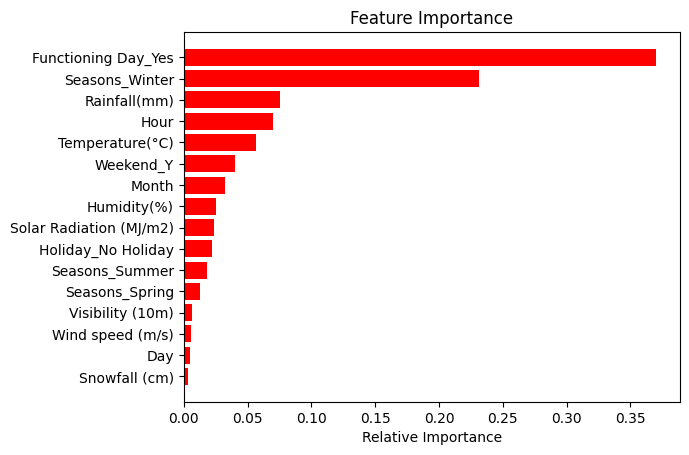

In [ ]:
# For both the default and tuned models, feature importances are extracted and visualized.
for i in [xgb,best_xgb]:
  features = X_train.columns
  importances = i.feature_importances_
  indices = np.argsort(importances)

  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The code utilizes XGBoost regression, a powerful gradient boosting algorithm that iteratively improves the predictions by fitting new models to the residuals of the previous predictions. After fitting both the default and tuned XGBoost regressor models, their performance metrics including MAE, MSE, RMSE, R², and Adjusted R² are calculated. The default model achieves an R² score of approximately 0.9278 on the test data, indicating a good fit. After hyperparameter tuning, the R² score improves to around 0.9453, indicating further improvement in model performance.

#### 2. Cross- Validation & Hyperparameter Tuning

Cross-validation is a technique used to assess the performance of a machine learning model by splitting the dataset into multiple subsets (folds), training the model on some folds, and evaluating it on the remaining folds. In this code, 5-fold cross-validation is employed to calculate the root mean squared error for both the default and tuned XGBoost models.

Hyperparameter tuning is performed using GridSearchCV, an exhaustive search technique that iterates over a specified parameter grid to find the optimal combination of hyperparameters that maximizes the performance of the model. GridSearchCV searches over various hyperparameters such as learning rate, max depth, min child weight, subsample, colsample by tree, and number of estimators to find the best combination for the XGBoost regressor model.


### ML Model - 9 : CatBoost Regressor

In [95]:
#installing CatBoost package
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.8 MB/s eta 0:00:00


In [ ]:
# Importing the Catboost Regressor class
from catboost import CatBoostRegressor

In [ ]:
# Displaying the list of columns in the main data frame
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Month', 'Days_of_week', 'Day', 'Weekend'],
      dtype='object')

In [ ]:
X=bike_df.drop(columns=['Date','Rented Bike Count','Days_of_week'])
y=bike_df['Rented Bike Count']

In [ ]:
# List of categorical columns
categorical_columns = X.select_dtypes(include=["object"]).columns.tolist()
print("Names of categorical columns : ", categorical_columns)

# Get location of categorical columns
categorical_features_indices = [X.columns.get_loc(col) for col in categorical_columns]
print("Location of categorical columns : ",categorical_features_indices)

Names of categorical columns :  ['Seasons', 'Holiday', 'Functioning Day', 'Weekend']
Location of categorical columns :  [8, 9, 10, 13]


In [ ]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

* **Catboost model with default set of parameters**

In [ ]:
# creating Catboost model
CB_regressor= CatBoostRegressor( loss_function='RMSE')

 # The model is trained on X_train and y_train, with categorical feature indices specified.
CB_regressor.fit(X_train,y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),verbose=False,plot=False)

In [ ]:
# Make predictions and evalution of Catboost model

print(f'Training score:{CB_regressor.score(X_train,y_train)}')

y_pred=CB_regressor.predict(X_test)

# Evaluating the model
list_of_models.append(evaluate_model('Catboost Regression(default)',X_test,y_test,y_pred))

Training score:0.9781454870001953
MAE : 91.88171116314396
MSE : 24268.891333672378
RMSE : 155.78475963223224
R2 : 0.9407772638702517
Adjusted R2 :  0.9404599587398206


<Axes: title={'center': 'Feature Importance'}>

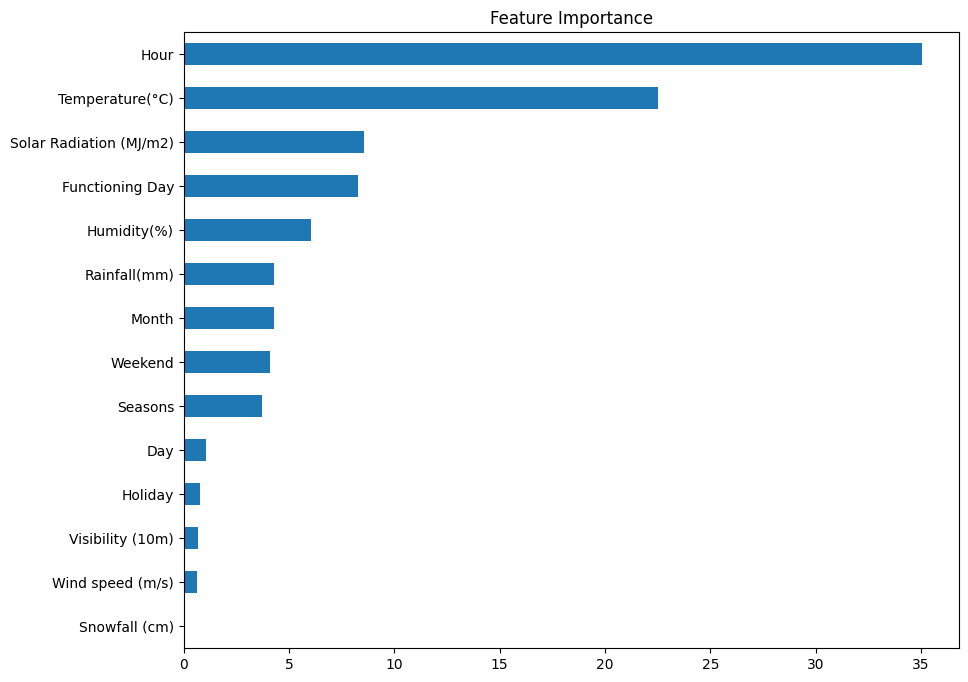

In [ ]:
# Visualizing features importance of Catboost model
plotting_imp_features(CB_regressor, X_train)

* **Catboost model with Hyperparameter tuning**

In [ ]:
#Finding the optimal parameters by Grid Search Cross Validation

parameters = {'depth' : [8,7,6],'learning_rate' : [0.025, 0.05, 0.1],'iterations':[100,200,500]}
CB_regressor = CatBoostRegressor(iterations=50, loss_function='RMSE',cat_features=categorical_features_indices)
grid = GridSearchCV(estimator=CB_regressor, param_grid = parameters, cv = 5, n_jobs=-1)
grid.fit(X_train, y_train)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)

0:	learn: 604.5917271	total: 13.9ms	remaining: 6.94s
1:	learn: 564.7596572	total: 24.6ms	remaining: 6.11s
2:	learn: 528.9504853	total: 34.6ms	remaining: 5.74s
3:	learn: 497.6696783	total: 44.4ms	remaining: 5.51s
4:	learn: 470.9545560	total: 54.6ms	remaining: 5.4s
5:	learn: 447.2791664	total: 64.3ms	remaining: 5.29s
6:	learn: 428.8862243	total: 74.4ms	remaining: 5.24s
7:	learn: 409.5376035	total: 83.2ms	remaining: 5.12s
8:	learn: 390.9951561	total: 93ms	remaining: 5.08s
9:	learn: 375.1771692	total: 103ms	remaining: 5.03s
10:	learn: 361.2152158	total: 113ms	remaining: 5.03s
11:	learn: 348.2132850	total: 124ms	remaining: 5.04s
12:	learn: 335.2016748	total: 135ms	remaining: 5.06s
13:	learn: 326.2422419	total: 146ms	remaining: 5.06s
14:	learn: 316.9903968	total: 157ms	remaining: 5.09s
15:	learn: 308.2366256	total: 165ms	remaining: 4.98s
16:	learn: 301.8662516	total: 172ms	remaining: 4.88s
17:	learn: 292.9768389	total: 179ms	remaining: 4.8s
18:	learn: 286.8108009	total: 187ms	remaining: 4.72

In [ ]:
# creating Catboost model
best_CB_regressor= CatBoostRegressor(iterations=500,depth=8,learning_rate=0.1, loss_function='RMSE')
 # train the model
best_CB_regressor.fit(X_train,y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),verbose=False,plot=False)

In [ ]:
#Make predictions and evalution of Catboost model

print(f'Training score:{best_CB_regressor.score(X_train,y_train)}')

y_pred=best_CB_regressor.predict(X_test)

# Evaluating the model
list_of_models.append(evaluate_model('Catboost Regression(tuned)',X_test,y_test,y_pred))

Training score:0.985898943747007
MAE : 86.31565900219194
MSE : 22706.282422074244
RMSE : 150.68603924078118
R2 : 0.9445904572284984
Adjusted R2 :  0.9442935825255513


<Axes: title={'center': 'Feature Importance'}>

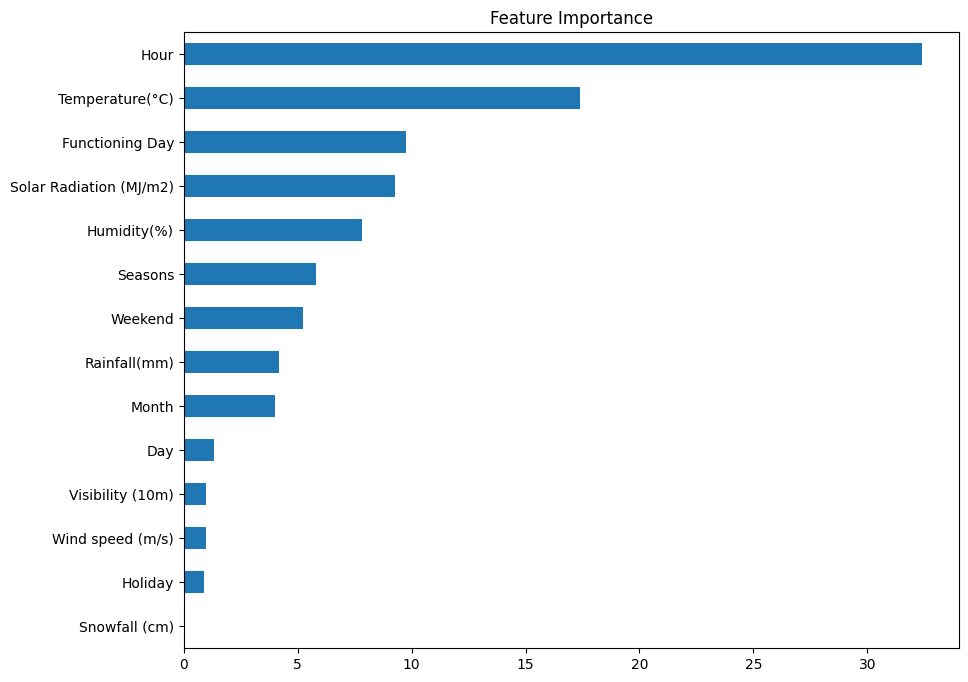

In [ ]:
# Visualizing features importance of the best Catboost model
plotting_imp_features(best_CB_regressor, X_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The code employs CatBoost Regression, a gradient boosting algorithm designed to handle categorical features naturally without the need for one-hot encoding. Initially, a CatBoost regressor is trained with default hyperparameters, and its performance is evaluated. Subsequently, hyperparameter tuning is performed using GridSearchCV to find the optimal combination of hyperparameters (depth, learning_rate, iterations). The best-performing model is then trained and evaluated on the test set. The performance metrics such as MAE, MSE, RMSE, R², and Adjusted R² are computed for both the default and tuned models. These metrics provide insights into the model's accuracy, with higher R² and lower MAE, MSE, and RMSE values indicating better performance.

#### 2. Cross- Validation & Hyperparameter Tuning

Cross-validation is employed to evaluate the model's performance and generalize its accuracy on unseen data. Specifically, 5-fold cross-validation is used during hyperparameter tuning to assess the model's performance across different subsets of the training data. Hyperparameter tuning is conducted using GridSearchCV, an exhaustive search technique that systematically evaluates the model's performance over a predefined grid of hyperparameters. By searching for the best combination of hyperparameters, GridSearchCV helps optimize the model's performance and improve its predictive accuracy.

In [ ]:
#Comparing models
Comparison_df=pd.DataFrame(list_of_models,columns=['Regression Model','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error','r2 score','adjusted r2 score'])
Comparison_df

Regression Model  Mean Absolute Error  Mean Squared Error  \
0         Multiple Linear Regression           327.665790       188770.692536   
1            Lasso Regression(Tuned)           327.578790       188737.802791   
2         Ridge Regression (default)           327.657172       188767.250135   
3            Ridge Regression(Tuned)           327.657214       188767.267238   
4    Elastic Net Regression(default)           332.689114       206068.926029   
5      Elastic Net Regression(Tuned)           327.559625       188730.345723   
6       Polynomial Regression(Tuned)           251.546994       144758.559266   
7   Decision Tree Regression (Tuned)           131.899447        53218.953984   
8    Random Forest Regression(Tuned)           102.489035        31687.869576   
9        XGBoost Regression(default)           101.231324        29575.638126   
10         XGBoost Regression(Tuned)            87.615673        22403.936932   
11      Catboost Regression(default)            91.881711        24268.891334   
12        Catboost Regression(tuned)            86.315659        22706.282422   

    Root Mean Squared Error  r2 score  adjusted r2 score  
0                434.477494  0.539348           0.536525  
1                434.439642  0.539428           0.536606  
2                434.473532  0.539356           0.536533  
3                434.473552  0.539356           0.536533  
4                453.948153  0.497135           0.494054  
5                434.431060  0.539446           0.536624  
6                380.471496  0.646750           0.644585  
7                230.692336  0.870131           0.869335  
8                178.010869  0.922673           0.922199  
9                171.975691  0.927827           0.927385  
10               149.679447  0.945328           0.944993  
11               155.784760  0.940777           0.940460  
12               150.686039  0.944590           0.944294

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**



* Evaluating the performance metrics of the models has brought us to a conclusion that Decison tree based Ensemble models like XGBoost and CatBoost models are the most suitable for Predicting the number of bikes required on an hourly basis.

* The important features for prediction are : Hour &Temperature.

* Due to the lack of significant linear correlation between the independent variables and the count of Rented bikes,Linear regression and Polynomial regression are not good fit in this scenario.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***